In [1]:
import sys
%matplotlib inline
sys.path.append("/usr/gapps/spot/dev/hatchet-venv/x86_64/lib/python3.9/site-packages/") # <-- Python packages
sys.path.append("/usr/gapps/spot/dev/hatchet/x86_64/") # <-- Hatchet
sys.path.append("/g/g91/nansamba1/thicket/") # <-- Thicket

from glob import glob

import pandas as pd

import thicket as th
import hatchet as ht

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

<IPython.core.display.Javascript object>

In [2]:
ht
th
th.__version__

'2024.2.1'

In [3]:
print(ht.__version__)
print(th.__version__)

2024.1.1
2024.2.1


# Read in Data

In [32]:
import glob
#Read in Kripke data
kripke_files = "/usr/workspace/nansamba1/workspace_grace_ruby_10_4_24/kripke/openmp/LLNL-Ruby-icelake-OmniPath/workspace/experiments/kripke/kripke"
#kripke_files = "/usr/workspace/nansamba1/workspace_grace_11-16-24/kripke/openmp/LLNL-Ruby-icelake-OmniPath/workspace/experiments/kripke/kripke"
kripke_cali_files = glob.glob(f"{kripke_files}/**/*.cali", recursive=True)
kripke_strong_scaling = [file for file in kripke_cali_files if 'strong' in  file]
kripke_weak_scaling = [file for file in kripke_cali_files if 'weak' in file]
tk_kripke = th.Thicket.from_caliperreader(kripke_strong_scaling, string_attributes="loop")
tk_kripke_weak = th.Thicket.from_caliperreader(kripke_weak_scaling, string_attributes="loop")

#Read in amg2023
amg2023_files = "/usr/workspace/nansamba1/workspace_grace_ruby_10-31-24_grid/amg2023/openmp/LLNL-Ruby-icelake-OmniPath/workspace/experiments/amg2023/problem1"
#bigger number of processes
#amg2023_files = "/usr/workspace/nansamba1/workspace_grace_ruby_11-17-24/amg2023/openmp/LLNL-Ruby-icelake-OmniPath/workspace/experiments/amg2023/problem1"
amg2023_files = glob.glob(f"{amg2023_files}/**/*.cali", recursive=True)
amg2023_strong_scaling = [file for file in amg2023_files if 'strong' in file]
amg2023_weak_scaling = [file for file in amg2023_files if 'weak' in file]
#amg2023_weak_s_scaling = [file for file in amg2023_files if 'weak_s' in file]

#amg2023_strong_scaling_120 = [file for file in amg2023_strong_scaling if '120' in file]
#amg2023_strong_scaling_160 = [file for file in amg2023_strong_scaling if '160' in file]
#amg2023_strong_scaling_200 = [file for file in amg2023_strong_scaling if '200' in file]

tk_amg2023 = th.Thicket.from_caliperreader(amg2023_strong_scaling, string_attributes="loop", fill_perfdata=False)
#tk_amg2023 = th.Thicket.from_caliperreader(amg2023_strong_scaling_120, string_attributes="loop", fill_perfdata=False)
tk_amg2023_weak = th.Thicket.from_caliperreader(amg2023_weak_scaling, string_attributes="loop", fill_perfdata=False)
#tk_amg2023_weak_s = th.Thicket.from_caliperreader(amg2023_weak_s_scaling, string_attributes="loop", fill_perfdata=False)

(2/2) Creating Thicket: 100%|██████████| 7/7 [00:06<00:00,  1.04it/s]


In [39]:
tk_amg2023_weak.metadata.head()

,cali.caliper.version,mpi.world.size,spot.metrics,spot.timeseries.metrics,spot.format.version,spot.options,spot.channels,cali.channel,opts:comm.stats,opts:node.order,opts:output,opts:profile.mpi,opts:region.count,opts:time.exclusive,adiakversion,user,uid,launchdate,launchday,executable,executablepath,working_directory,libraries,cmdline,hostname,cluster,jobsize,numhosts,hostlist,mpi_version,mpi_library_vendor,mpi_library_version,compiler,compiler version,Size-x,Size-y,Size-z,Px,Py,Pz,Problem,Solver,Setup-FOM,Solve-FOM,Final-FOM
profile,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
125475836,2.12.0-dev,32,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"profile.mpi,comm.stats,node.order,region.count...",regionprofile,spot,true,true,/usr/workspace/nansamba1/workspace_grace_ruby_...,true,true,true,0.4.0,nansamba1,"Grace Nansamba, +19254229988",1730415984,1730332800,amg,/usr/WS2/nansamba1/workspace_grace_ruby_10-31-...,/usr/WS2/nansamba1/workspace_grace_ruby_10-31-...,"[linux-vdso.so.1, /usr/WS2/nansamba1/workspace...",[/usr/workspace/nansamba1/workspace_grace_ruby...,ruby1496,ruby,32,1,[ruby1496],3.1,MVAPICH2,2.3.7,GNU,12.1.1,60,60,60,4,4,2,1,GMRES,434405000.0,333424000.0,188637000.0
350451251,2.12.0-dev,32,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"profile.mpi,comm.stats,node.order,region.count...",regionprofile,spot,true,true,/usr/workspace/nansamba1/workspace_grace_ruby_...,true,true,true,0.4.0,nansamba1,"Grace Nansamba, +19254229988",1730415989,1730332800,amg,/usr/WS2/nansamba1/workspace_grace_ruby_10-31-...,/usr/WS2/nansamba1/workspace_grace_ruby_10-31-...,"[linux-vdso.so.1, /usr/WS2/nansamba1/workspace...",[/usr/workspace/nansamba1/workspace_grace_ruby...,ruby650,ruby,32,1,[ruby650],3.1,MVAPICH2,2.3.7,GNU,12.1.1,40,40,40,4,4,2,1,GMRES,400016000.0,333816000.0,181965000.0
1202973737,2.12.0-dev,8,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"profile.mpi,comm.stats,node.order,region.count...",regionprofile,spot,true,true,/usr/workspace/nansamba1/workspace_grace_ruby_...,true,true,true,0.4.0,nansamba1,"Grace Nansamba, +19254229988",1730415953,1730332800,amg,/usr/WS2/nansamba1/workspace_grace_ruby_10-31-...,/usr/WS2/nansamba1/workspace_grace_ruby_10-31-...,"[linux-vdso.so.1, /usr/WS2/nansamba1/workspace...",[/usr/workspace/nansamba1/workspace_grace_ruby...,ruby1413,ruby,8,1,[ruby1413],3.1,MVAPICH2,2.3.7,GNU,12.1.1,60,60,60,2,2,2,1,GMRES,144161000.0,118671000.0,65090100.0
1536358609,2.12.0-dev,64,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"profile.mpi,comm.stats,node.order,region.count...",regionprofile,spot,true,true,/usr/workspace/nansamba1/workspace_grace_ruby_...,true,true,true,0.4.0,nansamba1,"Grace Nansamba, +19254229988",1730415986,1730332800,amg,/usr/WS2/nansamba1/workspace_grace_ruby_10-31-...,/usr/WS2/nansamba1/workspace_grace_ruby_10-31-...,"[linux-vdso.so.1, /usr/WS2/nansamba1/workspace...",[/usr/workspace/nansamba1/workspace_grace_ruby...,ruby159,ruby,64,2,"[ruby159, ruby644]",3.1,MVAPICH2,2.3.7,GNU,12.1.1,40,40,40,4,4,4,1,GMRES,698560000.0,634141000.0,332397000.0
1620022665,2.12.0-dev,16,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"profile.mpi,comm.stats,node.order,region.count...",regionprofile,spot,true,true,/usr/workspace/nansamba1/workspace_grace_ruby_...,true,true,true,0.4.0,nansamba1,"Grace Nansamba, +19254229988",1730415955,1730332800,amg,/usr/WS2/nansamba1/workspace_grace_ruby_10-31-...,/usr/WS2/nansamba1/workspace_grace_ruby_10-31-...,"[linux-vdso.so.1, /usr/WS2/nansamba1/workspace...",[/usr/workspace/nansamba1/workspace_grace_ruby...,ruby1315,ruby,16,1,[ruby1315],3.1,MVAPICH2,2.3.7,GNU,12.1.1,60,60,60,4,2,2,1,GMRES,261152000.0,225244000.0,120936000.0


# calculation for loops

In [33]:
#average calls/rank - 1 = total loops
#max time per rank / calls/rank = avg time per iteration 
tk_kripke.dataframe["Total Loops"] = tk_kripke.dataframe["Calls/rank (avg)"] -1
tk_kripke.dataframe["Avg Time Per Loop"] = tk_kripke.dataframe["Max time/rank"] / tk_kripke.dataframe["Total Loops"]

tk_kripke_weak.dataframe["Total Loops"] = tk_kripke_weak.dataframe["Calls/rank (avg)"] -1
tk_kripke_weak.dataframe["Avg Time Per Loop"] = tk_kripke_weak.dataframe["Max time/rank"] / tk_kripke_weak.dataframe["Total Loops"]

tk_amg2023.dataframe["Total Loops"] = tk_amg2023.dataframe["Calls/rank (avg)"] -1
tk_amg2023.dataframe["Avg Time Per Loop"] = tk_amg2023.dataframe["Max time/rank"] / tk_amg2023.dataframe["Total Loops"]

tk_amg2023_weak.dataframe["Total Loops"] = tk_amg2023_weak.dataframe["Calls/rank (avg)"] -1
tk_amg2023_weak.dataframe["Avg Time Per Loop"] = tk_amg2023_weak.dataframe["Max time/rank"] / tk_amg2023_weak.dataframe["Total Loops"]


In [47]:
#print(tk_amg2023_weak.tree(metric_column="Max time/rank"))

# Filter data 

In [34]:
#filter data by loop 
query = th.query.Query().match(
    ".",
    lambda row: row["name"].apply(
        lambda n: "hypre_BoomerAMGSolve" in n
    ).all()
).rel("*")
filtered_tk_amg = tk_amg2023.query(query)
filtered_tk_amg_weak = tk_amg2023_weak.query(query)

In [35]:
# filter by halo_excahnge
query="""
    MATCH ("*")->(".",p)->("*")->("*",q)
    WHERE p."name" = "halo_exchange"
    AND q."name" STARTS WITH "MPI"
    """
filtered_tk_kripke = tk_kripke.query(query, multi_index_mode="all")
filtered_tk_kripke_weak = tk_kripke_weak.query(query, multi_index_mode="all")

filtered_tk_amg_halo = filtered_tk_amg.query(query, multi_index_mode="all")
filtered_tk_amg_halo_weak = filtered_tk_amg_weak.query(query, multi_index_mode="all")

#print(filtered_tk_kripke.tree(metric_column="Calls/rank (max)"))

In [9]:
print(filtered_tk_kripke.tree(metric_column="Avg time/rank (exc)"))

  _____ _     _      _        _   
 |_   _| |__ (_) ___| | _____| |_ 
   | | | '_ \| |/ __| |/ / _ \ __|
   | | | | | | | (__|   <  __/ |_ 
   |_| |_| |_|_|\___|_|\_\___|\__|  v2024.1.0

0.003 main
└─ 0.230 Solve
   └─ 1.242 solve
      └─ 0.412 SweepSolver
         └─ 0.682 halo_exchange
            ├─ 0.003 MPI_Irecv
            ├─ 0.005 MPI_Isend
            ├─ 0.714 MPI_Testany
            └─ 0.107 MPI_Waitall

Legend (Metric: Avg time/rank (exc) Min: 0.00 Max: 1.24 indices: {'profile': 710386300})
█ 1.12 - 1.24
█ 0.87 - 1.12
█ 0.62 - 0.87
█ 0.37 - 0.62
█ 0.13 - 0.37
█ 0.00 - 0.13

name User code    ◀  Only in left graph    ▶  Only in right graph



In [8]:
available_columns = filtered_tk_amg_halo.show_metric_columns()
#print(available_columns)

In [26]:
#print(filtered_tk_amg_halo.tree(metric_column="Max time/rank"))

In [ ]:
#print(filtered_tk_amg_halo.dataframe["Bytes sent (max)"])
#print(tk_amg2023_weak.tree(metric_column="Bytes sent (max)"))

In [34]:
#print(filtered_tk_amg.dataframe["Bytes sent (max)"])

In [36]:
filtered_tk_amg_halo.dataframe["Benchmark"] = "AMG2023"
filtered_tk_kripke.dataframe["Benchmark"] = "Kripke"
filtered_tk_amg_halo_weak.dataframe["Benchmark"] = "AMG2023"
filtered_tk_kripke_weak.dataframe["Benchmark"] = "Kripke"

In [37]:
filtered_tk_amg_halo.dataframe["Scaling"] = "strong"
filtered_tk_kripke.dataframe["Scaling"] = "strong"
filtered_tk_amg_halo_weak.dataframe["Scaling"] = "weak"
filtered_tk_kripke_weak.dataframe["Scaling"] = "weak"

In [38]:
tk_kripke.metadata_columns_to_perfdata("mpi.world.size")
tk_amg2023.metadata_columns_to_perfdata("mpi.world.size")
#filtered_tk_kripke_weak.metadata_columns_to_perfdata("mpi.world.size")
#filtered_tk_amg_halo_weak.metadata_columns_to_perfdata("mpi.world.size")

In [39]:
filtered_tk_kripke.metadata_columns_to_perfdata("mpi.world.size")
filtered_tk_amg_halo.metadata_columns_to_perfdata("mpi.world.size")
filtered_tk_kripke_weak.metadata_columns_to_perfdata("mpi.world.size")
filtered_tk_amg_halo_weak.metadata_columns_to_perfdata("mpi.world.size")

# calculate total bytes per rank

In [40]:
filtered_tk_amg_halo.dataframe["bytes/rank"] = filtered_tk_amg_halo.dataframe["Bytes sent (total)"] / filtered_tk_amg_halo.dataframe["mpi.world.size"]
filtered_tk_amg_halo_weak.dataframe["bytes/rank"] = filtered_tk_amg_halo_weak.dataframe["Bytes sent (total)"] / filtered_tk_amg_halo_weak.dataframe["mpi.world.size"]

In [41]:
filtered_tk_amg_halo.metadata_columns_to_perfdata(["Size-x", "Size-y", "Size-z", "Px", "Py", "Pz"])
filtered_tk_amg_halo_weak.metadata_columns_to_perfdata(["Size-x", "Size-y", "Size-z", "Px", "Py", "Pz"])

In [42]:
filtered_tk_amg_halo.dataframe["global_x"] = filtered_tk_amg_halo.dataframe["Size-x"] * filtered_tk_amg_halo.dataframe["Px"] 
filtered_tk_amg_halo.dataframe["global_y"] = filtered_tk_amg_halo.dataframe["Size-y"] * filtered_tk_amg_halo.dataframe["Py"] 
filtered_tk_amg_halo.dataframe["global_z"] = filtered_tk_amg_halo.dataframe["Size-z"] * filtered_tk_amg_halo.dataframe["Pz"] 

filtered_tk_amg_halo_weak.dataframe["global_x"] = filtered_tk_amg_halo_weak.dataframe["Size-x"] * filtered_tk_amg_halo_weak.dataframe["Px"] 
filtered_tk_amg_halo_weak.dataframe["global_y"] = filtered_tk_amg_halo_weak.dataframe["Size-y"] * filtered_tk_amg_halo_weak.dataframe["Py"] 
filtered_tk_amg_halo_weak.dataframe["global_z"] = filtered_tk_amg_halo_weak.dataframe["Size-z"] * filtered_tk_amg_halo_weak.dataframe["Pz"] 

In [43]:
filtered_tk_amg_halo_weak.dataframe["grid_size"] = filtered_tk_amg_halo_weak.dataframe["global_x"] * filtered_tk_amg_halo_weak.dataframe["global_y"] * filtered_tk_amg_halo_weak.dataframe["global_z"]


In [58]:
available_columns = filtered_tk_amg_halo.show_metric_columns()
print(available_columns)

['Src ranks (max)', 'Sends (min)', 'Dst ranks (min)', 'Recvs (min)', 'Avg time/rank (exc)', 'Recvs (max)', 'Calls (total)', 'Min time/rank', 'Calls/rank (max)', 'Src ranks (min)', 'Bytes recv (total)', 'Min time/rank (exc)', 'Src ranks (avg)', 'Total time', 'Max time/rank (exc)', 'Sends (max)', 'Bytes sent (total)', 'Bytes recv (max)', 'Calls/rank (avg)', 'Avg time/rank', 'Bytes sent (max)', 'Coll (max)', 'Dst ranks (max)', 'Sends (total)', 'Total time (exc)', 'Dst ranks (avg)', 'Bytes sent (min)', 'Calls/rank (min)', 'Recvs (total)', 'Max time/rank', 'Bytes recv (min)', 'Sends (total) (inc)', 'Dst ranks (min) (inc)', 'Recvs (min) (inc)', 'Sends (min) (inc)', 'Max time/rank (inc)', 'Src ranks (min) (inc)', 'Coll (max) (inc)', 'Src ranks (max) (inc)', 'Sends (max) (inc)', 'Dst ranks (avg) (inc)', 'Min time/rank', 'Bytes sent (max) (inc)', 'Total time (inc)', 'Bytes recv (max) (inc)', 'Min time/rank (inc)', 'Calls/rank (min) (inc)', 'Src ranks (avg) (inc)', 'Total time', 'Bytes recv (min

In [44]:
gb = filtered_tk_amg_halo_weak.groupby("mpi.world.size")
for size, ttk in gb.items():
    children = len(ttk.get_node("hypre_BoomerAMGCycle").children)
    for i in range (children): 
        temp_string = f"MG level {i}"
        df_src = ttk.dataframe.loc[ttk.get_node(temp_string), "Src ranks (avg) (inc)"] / len(ttk.get_node(temp_string).children)
        df_dst = ttk.dataframe.loc[ttk.get_node(temp_string), "Dst ranks (avg) (inc)"] / len(ttk.get_node(temp_string).children)
        df_bytes = ttk.dataframe.loc[ttk.get_node(temp_string), "Bytes sent (total) (inc)"] / len(ttk.get_node(temp_string).children)

        #add bytes here
        for p in df_src.index:
            ttk.dataframe.loc[(ttk.get_node(temp_string), p), "avg_src_ranks"] = df_src.loc[p]
            ttk.dataframe.loc[(ttk.get_node(temp_string), p), "avg_dst_ranks"] = df_dst.loc[p]
            ttk.dataframe.loc[(ttk.get_node(temp_string), p), "avg_Bytes_sent_total"] = df_bytes.loc[p]
            #add new average sent
    #print(ttk.tree(metric_column = "avg_src_ranks"))
    


In [45]:
gb_strong = filtered_tk_amg_halo.groupby("mpi.world.size")
for size, ttk in gb_strong.items():
    children = len(ttk.get_node("hypre_BoomerAMGCycle").children)
    for i in range (children): 
        temp_string = f"MG level {i}"
        df_src = ttk.dataframe.loc[ttk.get_node(temp_string), "Src ranks (avg) (inc)"] / len(ttk.get_node(temp_string).children)
        df_dst = ttk.dataframe.loc[ttk.get_node(temp_string), "Dst ranks (avg) (inc)"] / len(ttk.get_node(temp_string).children)
        df_bytes = ttk.dataframe.loc[ttk.get_node(temp_string), "Bytes sent (total) (inc)"] / len(ttk.get_node(temp_string).children)

        #add bytes here
        for p in df_src.index:
            ttk.dataframe.loc[(ttk.get_node(temp_string), p), "avg_src_ranks"] = df_src.loc[p]
            ttk.dataframe.loc[(ttk.get_node(temp_string), p), "avg_dst_ranks"] = df_dst.loc[p]
            ttk.dataframe.loc[(ttk.get_node(temp_string), p), "avg_Bytes_sent_total"] = df_bytes.loc[p]
            #add new average sent
    #print(ttk.tree(metric_column = "avg_src_ranks"))


In [46]:
filtered_tk_amg_halo_weak_appended = th.Thicket.concat_thickets(thickets=list(gb.values()))
filtered_tk_amg_halo_appended = th.Thicket.concat_thickets(thickets=list(gb_strong.values()))

#ctk.dataframe["avg_src_ranks"]

In [62]:
print("Columns in ttk.dataframe:", ttk.dataframe.columns)
#print("Sample data:\n", ttk.dataframe.head())

Columns in ttk.dataframe: Index(['nid', 'spot.channel', 'Min time/rank', 'Max time/rank',
       'Avg time/rank', 'Total time', 'Calls/rank (min)', 'Calls/rank (avg)',
       'Calls/rank (max)', 'Calls (total)', 'Min time/rank (exc)',
       'Max time/rank (exc)', 'Avg time/rank (exc)', 'Total time (exc)',
       'Sends (min)', 'Sends (max)', 'Sends (total)', 'Recvs (min)',
       'Recvs (max)', 'Recvs (total)', 'Dst ranks (min)', 'Dst ranks (max)',
       'Dst ranks (avg)', 'Src ranks (min)', 'Src ranks (max)',
       'Src ranks (avg)', 'Coll (max)', 'Bytes sent (min)', 'Bytes sent (max)',
       'Bytes sent (total)', 'Bytes recv (min)', 'Bytes recv (max)',
       'Bytes recv (total)', 'loop', 'name', 'Total Loops',
       'Avg Time Per Loop', 'Src ranks (max) (inc)', 'Sends (min) (inc)',
       'Dst ranks (min) (inc)', 'Recvs (min) (inc)', 'Recvs (max) (inc)',
       'Calls (total) (inc)', 'Min time/rank (inc)', 'Calls/rank (max) (inc)',
       'Src ranks (min) (inc)', 'Bytes recv (t

In [63]:
filtered_tk_amg_halo_weak.dataframe.head()

nid  \
node                                               profile            
{'name': 'hypre_BoomerAMGSolve', 'type': 'funct... 216674330  584.0   
                                                   291558265  492.0   
                                                   497173270  541.0   
                                                   715302368  530.0   
                                                   850358828  569.0   

                                                               spot.channel  \
node                                               profile                    
{'name': 'hypre_BoomerAMGSolve', 'type': 'funct... 216674330  regionprofile   
                                                   291558265  regionprofile   
                                                   497173270  regionprofile   
                                                   715302368  regionprofile   
                                                   850358828  regionprofile   

                                                              Min time/rank  \
node                                               profile                    
{'name': 'hypre_BoomerAMGSolve', 'type': 'funct... 216674330       1.095131   
                                                   291558265       0.249292   
                                                   497173270       0.778758   
                                                   715302368       0.319128   
                                                   850358828       0.462737   

                                                              Max time/rank  \
node                                               profile                    
{'name': 'hypre_BoomerAMGSolve', 'type': 'funct... 216674330       1.249430   
                                                   291558265       0.279689   
                                                   497173270       0.850509   
                                                   715302368       0.460062   
                                                   850358828       0.816321   

                                                              Avg time/rank  \
node                                               profile                    
{'name': 'hypre_BoomerAMGSolve', 'type': 'funct... 216674330       1.167790   
                                                   291558265       0.263255   
                                                   497173270       0.813397   
                                                   715302368       0.370375   
                                                   850358828       0.595268   

                                                              Total time  \
node                                               profile                 
{'name': 'hypre_BoomerAMGSolve', 'type': 'funct... 216674330   37.325291   
                                                   291558265    4.205655   
                                                   497173270    6.506065   
                                                   715302368   23.527580   
                                                   850358828  148.834168   

                                                              Calls/rank (min)  \
node                                               profile                       
{'name': 'hypre_BoomerAMGSolve', 'type': 'funct... 216674330                13   
                                                   291558265                13   
                                                   497173270                13   
                                                   715302368                13   
                                                   850358828                13   

                                                              Calls/rank (avg)  \
node                                               profile                       
{'name': 'hypre_BoomerAMGSolve', 'type': 'funct... 216674330              13.0

In [65]:
filtered_tk_amg_halo.dataframe.head()

nid  \
node                                               profile             
{'name': 'hypre_BoomerAMGSolve', 'type': 'funct... 340106721   475.0   
                                                   746698421   601.0   
                                                   1237479062  584.0   
                                                   1420915599  519.0   
                                                   1591055140  475.0   

                                                                spot.channel  \
node                                               profile                     
{'name': 'hypre_BoomerAMGSolve', 'type': 'funct... 340106721   regionprofile   
                                                   746698421   regionprofile   
                                                   1237479062  regionprofile   
                                                   1420915599  regionprofile   
                                                   1591055140  regionprofile   

                                                               Min time/rank  \
node                                               profile                     
{'name': 'hypre_BoomerAMGSolve', 'type': 'funct... 340106721        0.053201   
                                                   746698421        3.327173   
                                                   1237479062       1.250392   
                                                   1420915599       0.118338   
                                                   1591055140       0.137761   

                                                               Max time/rank  \
node                                               profile                     
{'name': 'hypre_BoomerAMGSolve', 'type': 'funct... 340106721        0.180698   
                                                   746698421        3.712491   
                                                   1237479062       1.476277   
                                                   1420915599       0.304519   
                                                   1591055140       0.224906   

                                                               Avg time/rank  \
node                                               profile                     
{'name': 'hypre_BoomerAMGSolve', 'type': 'funct... 340106721        0.105435   
                                                   746698421        3.511337   
                                                   1237479062       1.348157   
                                                   1420915599       0.186632   
                                                   1591055140       0.172383   

                                                               Total time  \
node                                               profile                  
{'name': 'hypre_BoomerAMGSolve', 'type': 'funct... 340106721    24.157398   
                                                   746698421    28.089925   
                                                   1237479062   43.087019   
                                                   1420915599   44.703301   
                                                   1591055140   10.881796   

                                                               Calls/rank (min)  \
node                                               profile                        
{'name': 'hypre_BoomerAMGSolve', 'type': 'funct... 340106721                 13   
                                                   746698421                 12   
                                                   1237479062                13   
                                                   1420915599                13   
                                                   1591055140                13   

                                                               Calls/rank (avg)  \
node                                               profile                        
{'name': 'hypre_BoomerAMGSol

# Plot graph average time per loop

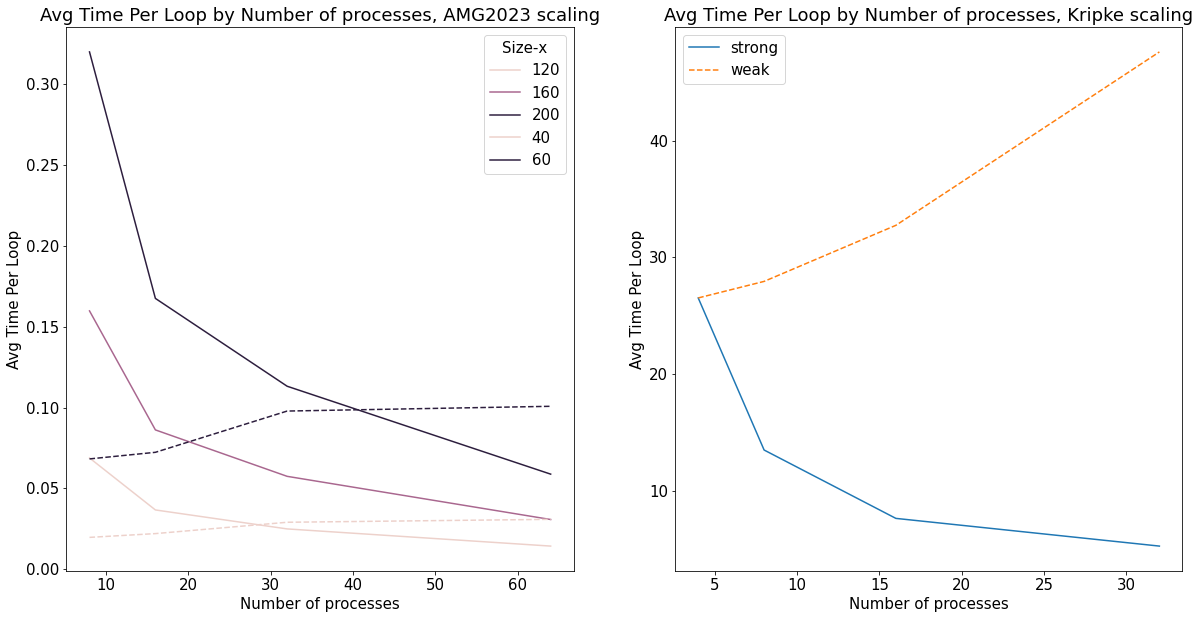

<Figure size 432x288 with 0 Axes>

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 15})

amg_node_weak = filtered_tk_amg_halo_weak.dataframe.loc[filtered_tk_amg_halo_weak.get_node("hypre_BoomerAMGSolve")]
kripke_node_weak = filtered_tk_kripke_weak.dataframe.loc[filtered_tk_kripke_weak.get_node("solve")]

amg_node_strong = filtered_tk_amg_halo.dataframe.loc[filtered_tk_amg_halo.get_node("hypre_BoomerAMGSolve")]
kripke_node_strong = filtered_tk_kripke.dataframe.loc[filtered_tk_kripke.get_node("solve")]

#df_amg = amg_node_weak.append(amg_node_strong, ignore_index=True)
#df_kripke = kripke_node_weak.append(kripke_node_strong, ignore_index=True)
#df_strong = filtered_tk_amg_halo.dataframe.append(filtered_tk_kripke.dataframe, ignore_index=True)
#print(df)
fig, ax = plt.subplots(1,2, figsize=(20, 10), sharey=False)
#sns.lineplot(data=amg_node_weak, ax=ax[0], x='mpi.world.size', y='Avg Time Per Loop', linestyle="--", hue="Size-x")
#sns.lineplot(data=amg_node_strong, ax=ax[0], x='mpi.world.size', y='Avg Time Per Loop', hue="global_x")

sns.lineplot(data=amg_node_strong, ax=ax[0], x='mpi.world.size', y='Avg Time Per Loop', hue="global_x")
sns.lineplot(data=amg_node_weak, ax=ax[0], x='mpi.world.size', y='Avg Time Per Loop', linestyle="--", hue="Size-x")

sns.lineplot(data=kripke_node_strong, x='mpi.world.size', ax=ax[1], y='Avg Time Per Loop', label="strong")
sns.lineplot(data=kripke_node_weak, x='mpi.world.size', ax=ax[1], y='Avg Time Per Loop', linestyle="--", label="weak")

ax[0].set_title('Avg Time Per Loop by Number of processes, AMG2023 scaling')
ax[1].set_title('Avg Time Per Loop by Number of processes, Kripke scaling')
plt.xlabel('Number of processes')
plt.ylabel('Avg Time Per Loop')
#ax[0].set_xscale("log", base=2)
#ax[1].set_xscale("log", base=2)
ax[0].set_xlabel('Number of processes')
ax[1].set_xlabel('Number of processes')



# Display the plot
plt.show()
plt.savefig("Avg Time Per Loop.png")

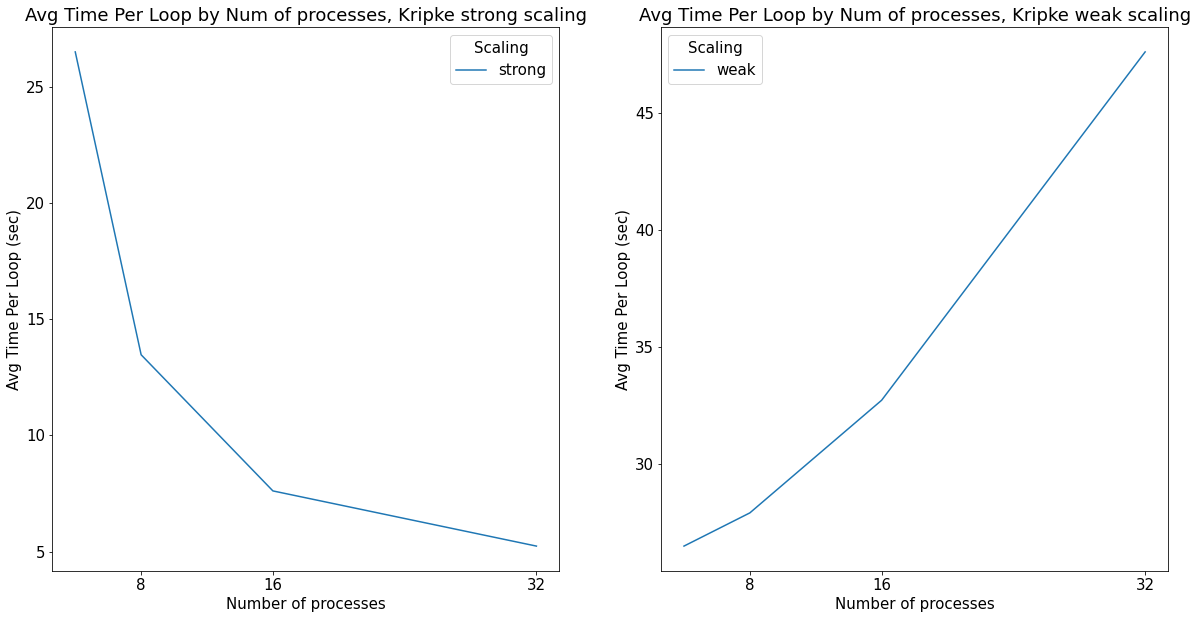

In [92]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 15})

amg_node_weak = filtered_tk_amg_halo_weak.dataframe.loc[filtered_tk_amg_halo_weak.get_node("hypre_BoomerAMGSolve")]
kripke_node_weak = filtered_tk_kripke_weak.dataframe.loc[filtered_tk_kripke_weak.get_node("solve")]

amg_node_strong = filtered_tk_amg_halo.dataframe.loc[filtered_tk_amg_halo.get_node("hypre_BoomerAMGSolve")]
kripke_node_strong = filtered_tk_kripke.dataframe.loc[filtered_tk_kripke.get_node("solve")]

#df_amg = amg_node_weak.append(amg_node_strong, ignore_index=True)
#df_kripke = kripke_node_weak.append(kripke_node_strong, ignore_index=True)
#df_strong = filtered_tk_amg_halo.dataframe.append(filtered_tk_kripke.dataframe, ignore_index=True)
#print(df)
fig, ax = plt.subplots(1,2, figsize=(20, 10), sharey=False)
#sns.lineplot(data=amg_node_weak, ax=ax[0], x='mpi.world.size', y='Avg Time Per Loop', linestyle="--", hue="Size-x")
#sns.lineplot(data=amg_node_strong, ax=ax[0], x='mpi.world.size', y='Avg Time Per Loop', hue="global_x")

#sns.lineplot(data=amg_node_strong, ax=ax[0], x='mpi.world.size', y='Avg Time Per Loop', hue="global_x", label="strong")
#sns.lineplot(data=amg_node_weak, ax=ax[0], x='mpi.world.size', y='Avg Time Per Loop', linestyle="--", hue="Size-x", label="weak")

sns.lineplot(data=kripke_node_strong, x='mpi.world.size', ax=ax[0], y='Avg Time Per Loop', hue="Scaling")
sns.lineplot(data=kripke_node_weak, x='mpi.world.size', ax=ax[1], y='Avg Time Per Loop', hue="Scaling")

ax[0].set_title('Avg Time Per Loop by Num of processes, Kripke strong scaling')
ax[1].set_title('Avg Time Per Loop by Num of processes, Kripke weak scaling')
#plt.xlabel('Number of processes')
#plt.ylabel('Avg Time Per Loop (sec)')
#ax[0].set_xscale("log", base=2)
#ax[1].set_xscale("log", base=2)
ax[0].set_xlabel('Number of processes')
ax[1].set_xlabel('Number of processes')
ax[0].set_ylabel('Avg Time Per Loop (sec)')
ax[1].set_ylabel('Avg Time Per Loop (sec)')


ax[0].set_xticks([8, 16, 32], ['8', '16', '32'])
ax[1].set_xticks([8, 16, 32], ['8', '16', '32'])
# Display the plot
plt.show()
fig.savefig("Avg Time Per Loop Kripke.png", facecolor='white', transparent=False)

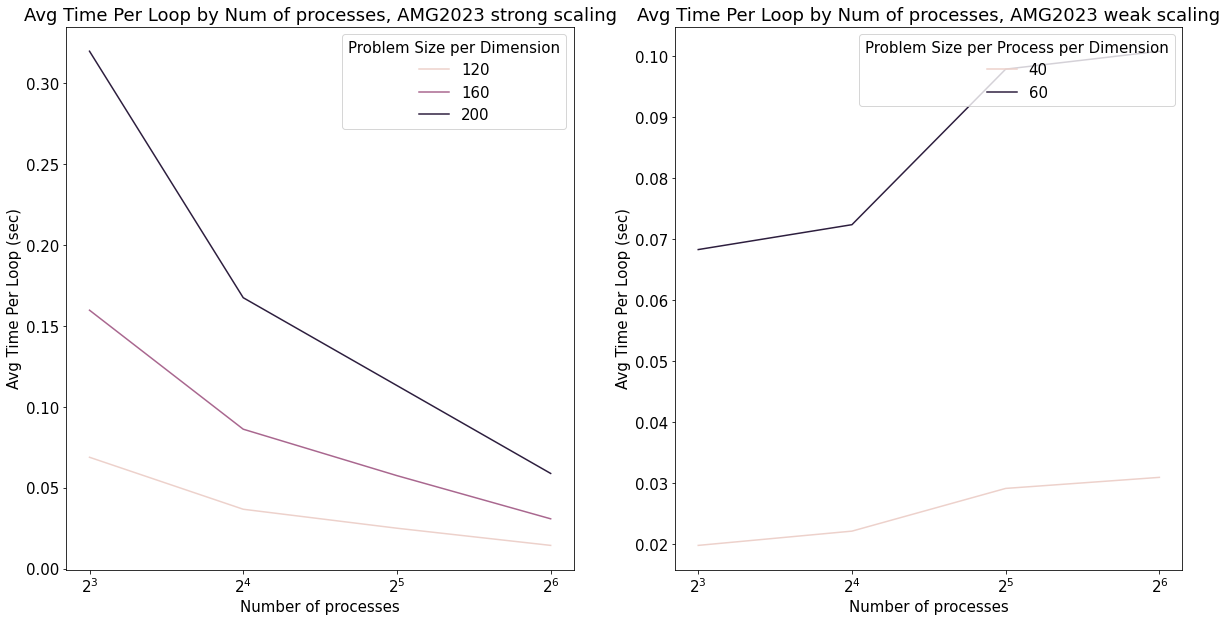

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 15})

amg_node_weak = filtered_tk_amg_halo_weak.dataframe.loc[filtered_tk_amg_halo_weak.get_node("hypre_BoomerAMGSolve")]
kripke_node_weak = filtered_tk_kripke_weak.dataframe.loc[filtered_tk_kripke_weak.get_node("solve")]

amg_node_strong = filtered_tk_amg_halo.dataframe.loc[filtered_tk_amg_halo.get_node("hypre_BoomerAMGSolve")]
kripke_node_strong = filtered_tk_kripke.dataframe.loc[filtered_tk_kripke.get_node("solve")]

#df_amg = amg_node_weak.append(amg_node_strong, ignore_index=True)
#df_kripke = kripke_node_weak.append(kripke_node_strong, ignore_index=True)
#df_strong = filtered_tk_amg_halo.dataframe.append(filtered_tk_kripke.dataframe, ignore_index=True)
#print(df)
fig, ax = plt.subplots(1,2, figsize=(20, 10), sharey=False)
#sns.lineplot(data=amg_node_weak, ax=ax[0], x='mpi.world.size', y='Avg Time Per Loop', linestyle="--", hue="Size-x")
#sns.lineplot(data=amg_node_strong, ax=ax[0], x='mpi.world.size', y='Avg Time Per Loop', hue="global_x")

sns.lineplot(data=amg_node_strong, ax=ax[0], x='mpi.world.size', y='Avg Time Per Loop', hue="global_x")
sns.lineplot(data=amg_node_weak, ax=ax[1], x='mpi.world.size', y='Avg Time Per Loop', hue="Size-x")

#sns.lineplot(data=kripke_node_strong, x='mpi.world.size', ax=ax[1], y='Avg Time Per Loop', label="strong")
#sns.lineplot(data=kripke_node_weak, x='mpi.world.size', ax=ax[1], y='Avg Time Per Loop', linestyle="--", label="weak")

ax[0].set_title('Avg Time Per Loop by Num of processes, AMG2023 strong scaling')
ax[1].set_title('Avg Time Per Loop by Num of processes, AMG2023 weak scaling')

ax[0].set_xscale("log", base=2)
ax[1].set_xscale("log", base=2)
ax[0].set_xlabel('Number of processes')
ax[1].set_xlabel('Number of processes')
ax[0].set_ylabel('Avg Time Per Loop (sec)')
ax[1].set_ylabel('Avg Time Per Loop (sec)')



ax[1].legend(title='Problem Size per Process per Dimension', loc='upper right',)
ax[0].legend(title='Problem Size per Dimension', loc='upper right',)

#ax[0].set_xticks([8, 16, 32, 64, 128, 256], ['8', '16', '32', '64', '128', '256'])
#ax[1].set_xticks([8, 16, 32, 64, 128, 256], ['8', '16', '32', '64', '128', '256'])


# Display the plot
plt.show()
fig.savefig("Avg Time Per Loop AMG2023_large.png", facecolor='white', transparent=False)

# average time per loop halo_exchange

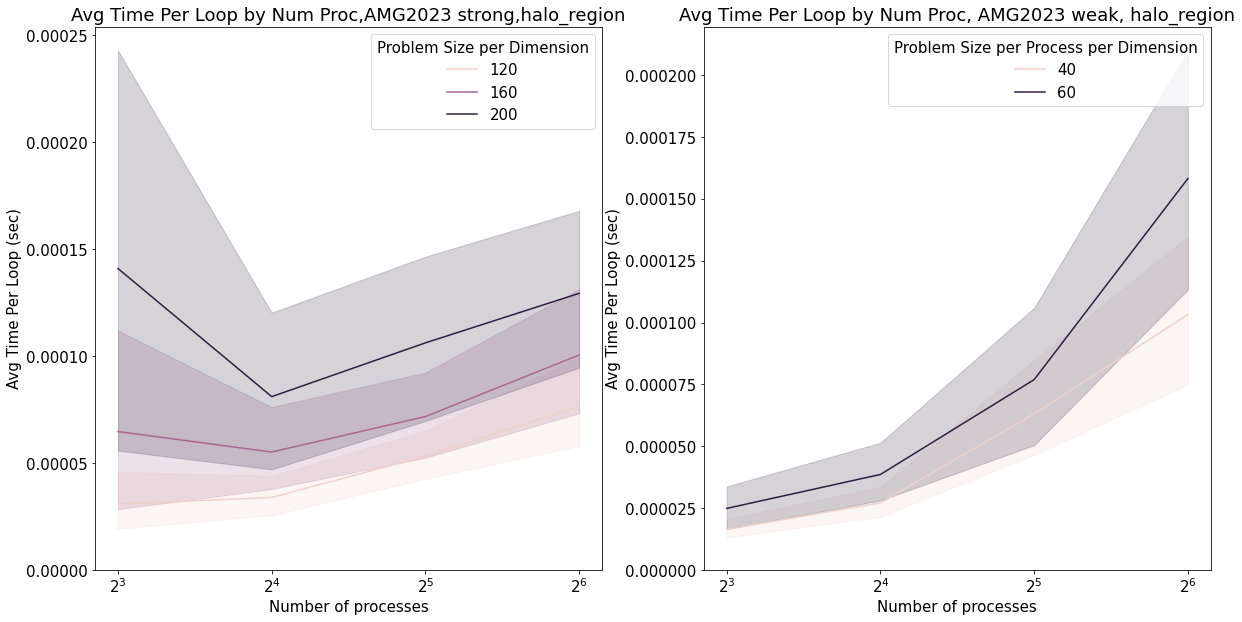

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 15})

amg_node_weak = filtered_tk_amg_halo_weak.dataframe.loc[filtered_tk_amg_halo_weak.get_node("halo_exchange")]
kripke_node_weak = filtered_tk_kripke_weak.dataframe.loc[filtered_tk_kripke_weak.get_node("halo_exchange")]

amg_node_strong = filtered_tk_amg_halo.dataframe.loc[filtered_tk_amg_halo.get_node("halo_exchange")]
kripke_node_strong = filtered_tk_kripke.dataframe.loc[filtered_tk_kripke.get_node("halo_exchange")]

#df_amg = amg_node_weak.append(amg_node_strong, ignore_index=True)
#df_kripke = kripke_node_weak.append(kripke_node_strong, ignore_index=True)
#df_strong = filtered_tk_amg_halo.dataframe.append(filtered_tk_kripke.dataframe, ignore_index=True)
#print(df)
fig, ax = plt.subplots(1,2, figsize=(20, 10), sharey=False)
#sns.lineplot(data=amg_node_weak, ax=ax[0], x='mpi.world.size', y='Avg Time Per Loop', linestyle="--", hue="Size-x")
#sns.lineplot(data=amg_node_strong, ax=ax[0], x='mpi.world.size', y='Avg Time Per Loop', hue="global_x")

sns.lineplot(data=amg_node_strong, ax=ax[0], x='mpi.world.size', y='Avg Time Per Loop', hue="global_x")
sns.lineplot(data=amg_node_weak, ax=ax[1], x='mpi.world.size', y='Avg Time Per Loop', hue="Size-x")

#sns.lineplot(data=kripke_node_strong, x='mpi.world.size', ax=ax[1], y='Avg Time Per Loop', label="strong")
#sns.lineplot(data=kripke_node_weak, x='mpi.world.size', ax=ax[1], y='Avg Time Per Loop', linestyle="--", label="weak")

ax[0].set_title('Avg Time Per Loop by Num Proc,AMG2023 strong,halo_region')
ax[1].set_title('Avg Time Per Loop by Num Proc, AMG2023 weak, halo_region')

ax[0].set_xscale("log", base=2)
ax[1].set_xscale("log", base=2)
ax[0].set_xlabel('Number of processes')
ax[1].set_xlabel('Number of processes')
ax[0].set_ylabel('Avg Time Per Loop (sec)')
ax[1].set_ylabel('Avg Time Per Loop (sec)')

ax[0].set_ylim(bottom=0)
ax[1].set_ylim(bottom=0)


ax[1].legend(title='Problem Size per Process per Dimension', loc='upper right',)
ax[0].legend(title='Problem Size per Dimension', loc='upper right',)

#ax[0].set_xticks([8, 16, 32, 64, 128, 256], ['8', '16', '32', '64', '128', '256'])
#ax[1].set_xticks([8, 16, 32, 64, 128, 256], ['8', '16', '32', '64', '128', '256'])


# Display the plot
plt.show()
fig.savefig("Avg Time Per Loop AMG2023_large_halo.png", facecolor='white', transparent=False)

# Problem 2, average time per loop 

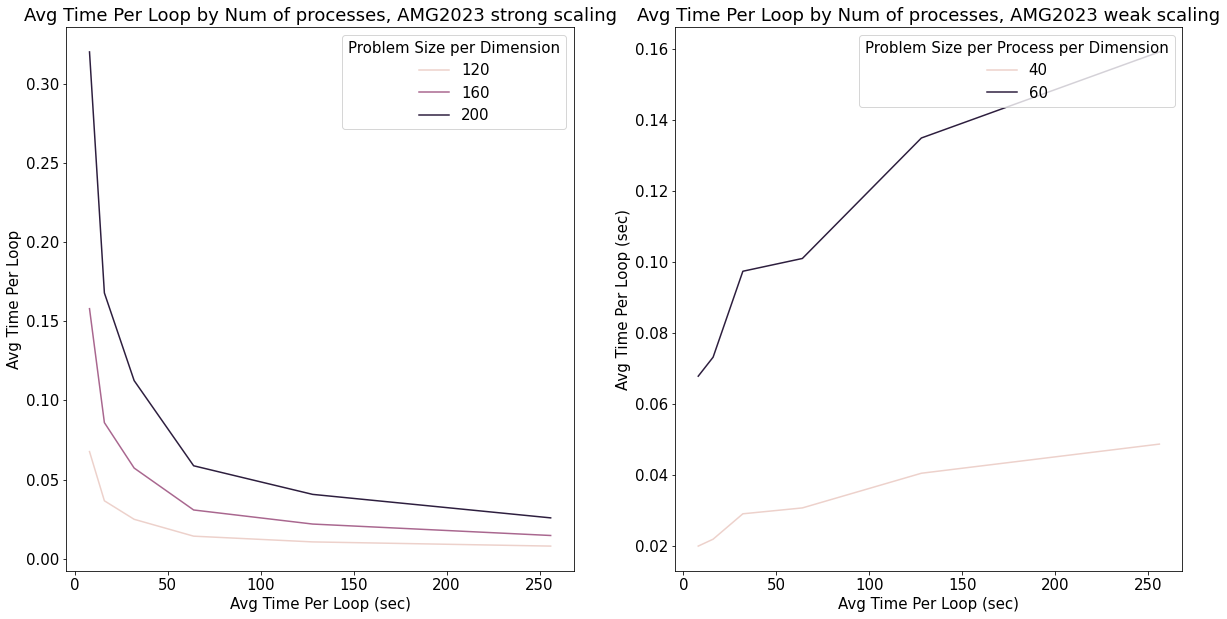

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 15})

amg_node_weak = filtered_tk_amg_halo_weak.dataframe.loc[filtered_tk_amg_halo_weak.get_node("hypre_BoomerAMGSolve")]
kripke_node_weak = filtered_tk_kripke_weak.dataframe.loc[filtered_tk_kripke_weak.get_node("solve")]

amg_node_strong = filtered_tk_amg_halo.dataframe.loc[filtered_tk_amg_halo.get_node("hypre_BoomerAMGSolve")]
kripke_node_strong = filtered_tk_kripke.dataframe.loc[filtered_tk_kripke.get_node("solve")]

#df_amg = amg_node_weak.append(amg_node_strong, ignore_index=True)
#df_kripke = kripke_node_weak.append(kripke_node_strong, ignore_index=True)
#df_strong = filtered_tk_amg_halo.dataframe.append(filtered_tk_kripke.dataframe, ignore_index=True)
#print(df)
fig, ax = plt.subplots(1,2, figsize=(20, 10), sharey=False)
#sns.lineplot(data=amg_node_weak, ax=ax[0], x='mpi.world.size', y='Avg Time Per Loop', linestyle="--", hue="Size-x")
#sns.lineplot(data=amg_node_strong, ax=ax[0], x='mpi.world.size', y='Avg Time Per Loop', hue="global_x")

sns.lineplot(data=amg_node_strong, ax=ax[0], x='mpi.world.size', y='Avg Time Per Loop', hue="global_x")
sns.lineplot(data=amg_node_weak, ax=ax[1], x='mpi.world.size', y='Avg Time Per Loop', hue="Size-x")

#sns.lineplot(data=kripke_node_strong, x='mpi.world.size', ax=ax[1], y='Avg Time Per Loop', label="strong")
#sns.lineplot(data=kripke_node_weak, x='mpi.world.size', ax=ax[1], y='Avg Time Per Loop', linestyle="--", label="weak")

ax[0].set_title('Avg Time Per Loop by Num of processes, AMG2023 strong scaling')
ax[1].set_title('Avg Time Per Loop by Num of processes, AMG2023 weak scaling')
plt.xlabel('Number of processes')
plt.ylabel('Avg Time Per Loop (sec)')
#ax[0].set_xscale("log", base=2)
#ax[1].set_xscale("log", base=2)
ax[0].set_xlabel('Number of processes')
ax[1].set_xlabel('Number of processes')

ax[0].set_xlabel('Avg Time Per Loop (sec)')
ax[1].set_xlabel('Avg Time Per Loop (sec)')

ax[1].legend(title='Problem Size per Process per Dimension', loc='upper right',)
ax[0].legend(title='Problem Size per Dimension', loc='upper right',)

#ax[0].set_xticks([8, 16, 32, 64], ['8', '16', '32', '64'])
#ax[1].set_xticks([8, 16, 32, 64], ['8', '16', '32', '64'])


# Display the plot
plt.show()
fig.savefig("Problem2 Avg Time Per Loop AMG2023.png", facecolor='white', transparent=False)

# Plots for Src rank (max)

<Figure size 1440x1440 with 0 Axes>

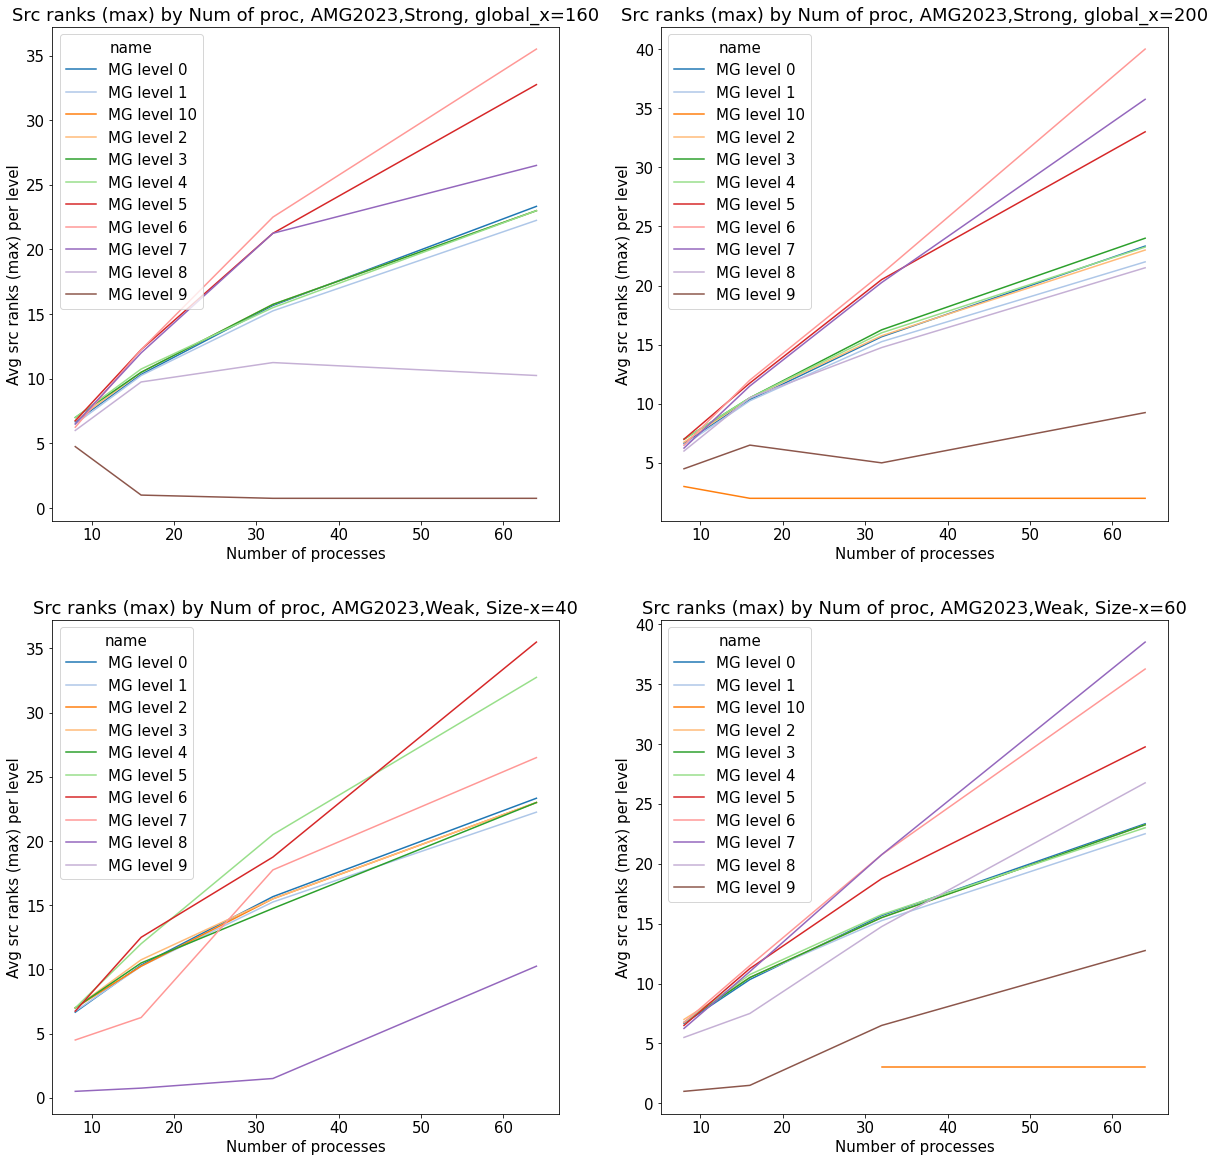

In [148]:
import seaborn as sns
import matplotlib.pyplot as plt


amg_node_weak = filtered_tk_amg_halo_weak_appended.dataframe[["avg_src_ranks", "mpi.world.size", "Size-x", "name"]].dropna()
amg_node_strong = filtered_tk_amg_halo_appended.dataframe[["avg_src_ranks", "mpi.world.size", "global_x", "name"]].dropna()

filtered_data_weak60 = amg_node_weak[amg_node_weak['Size-x'] == 60]
filtered_data_weak40 = amg_node_weak[amg_node_weak['Size-x'] == 40]

filtered_data_strong120 = amg_node_strong[amg_node_strong['global_x'] == 120]
filtered_data_strong160 = amg_node_strong[amg_node_strong['global_x'] == 160]
filtered_data_strong200 = amg_node_strong[amg_node_strong['global_x'] == 200]


#kripke_node_weak = filtered_tk_kripke_weak.dataframe.loc[filtered_tk_kripke_weak.get_node("halo_exchange")]

#amg_node_strong = filtered_tk_amg_halo.dataframe.loc[filtered_tk_amg_halo.get_node("halo_exchange")]
#kripke_node_strong = filtered_tk_kripke.dataframe.loc[filtered_tk_kripke.get_node("halo_exchange")]
plt.figure(figsize=(20, 20))

#df_strong = kripke_node_strong.append(amg_node_strong, ignore_index=True)
#df_weak = kripke_node_weak.append(amg_node_weak, ignore_index=True)

fig, ax = plt.subplots(2,2, figsize=(20, 20), sharey=False)

#sns.lineplot(data=amg_node_strong, x='mpi.world.size', ax=ax[0], y='Src ranks (max)', hue="global_x")
#sns.lineplot(data=kripke_node_strong, x='mpi.world.size', ax=ax[0], y='Src ranks (max)', linestyle="--")
#sns.lineplot(data=amg_node_weak, x='mpi.world.size', ax=ax[1], y='avg_src_ranks', style="Size-x", hue="name", palette=sns.color_palette("tab20", n_colors=11))
sns.lineplot(data=filtered_data_strong160, x='mpi.world.size', ax=ax[0,0], y='avg_src_ranks', hue="name", palette=sns.color_palette("tab20", n_colors=11))
sns.lineplot(data=filtered_data_strong200, x='mpi.world.size', ax=ax[0,1], y='avg_src_ranks', hue="name", palette=sns.color_palette("tab20", n_colors=11))

#sns.lineplot(data=filtered_data_strong120, x='mpi.world.size', ax=ax[0,0], y='avg_src_ranks', hue="name", palette=sns.color_palette("tab20", n_colors=11))
#sns.lineplot(data=amg_node_strong, x='mpi.world.size', ax=ax[0,1], y='avg_src_ranks', style="global_x", hue="name", palette=sns.color_palette("tab20", n_colors=11))
sns.lineplot(data=filtered_data_weak60, x='mpi.world.size', ax=ax[1,1], y='avg_src_ranks', hue="name", palette=sns.color_palette("tab20", n_colors=11))
sns.lineplot(data=filtered_data_weak40, x='mpi.world.size', ax=ax[1,0], y='avg_src_ranks', hue="name", palette=sns.color_palette("tab20", n_colors=10))
#sns.lineplot(data=amg_node_weak, x='mpi.world.size', ax=ax[1,1], y='avg_src_ranks', style="Size-x", hue="name", palette=sns.color_palette("tab20", n_colors=11))



#sns.lineplot(data=kripke_node_weak, x='mpi.world.size', ax=ax[1], y='Src ranks (max)', linestyle="--")

#sns.lineplot(data=amg_node_weak, ax=ax[0], x='mpi.world.size', y='Avg Time Per Loop', linestyle="--", hue="Size-x")
#sns.lineplot(data=amg_node_strong, ax=ax[0], x='mpi.world.size', y='Avg Time Per Loop', hue="global_x")


ax[0,0].set_title('Src ranks (max) by Num of proc, AMG2023,Strong, global_x=160')
ax[0,1].set_title('Src ranks (max) by Num of proc, AMG2023,Strong, global_x=200')
ax[1,1].set_title('Src ranks (max) by Num of proc, AMG2023,Weak, Size-x=60')
ax[1,0].set_title('Src ranks (max) by Num of proc, AMG2023,Weak, Size-x=40')
ax[0,0].set_xlabel('Number of processes')
ax[0,1].set_xlabel('Number of processes')
ax[1,0].set_xlabel('Number of processes')
ax[1,1].set_xlabel('Number of processes')

ax[0,0].set_ylabel('Avg src ranks (max) per level')
ax[0,1].set_ylabel('Avg src ranks (max) per level')
ax[1,0].set_ylabel('Avg src ranks (max) per level')
ax[1,1].set_ylabel('Avg src ranks (max) per level')
#plt.ylabel('avg_src_ranks')
#ax[0].set_xscale("log", base=2)
#ax[1].set_xscale("log", base=2)

# Display the plot
plt.show()

fig.savefig("src_ranks AMG.png", facecolor='white', transparent=False)

# Plots for Dst rank (max)

<Figure size 1440x1440 with 0 Axes>

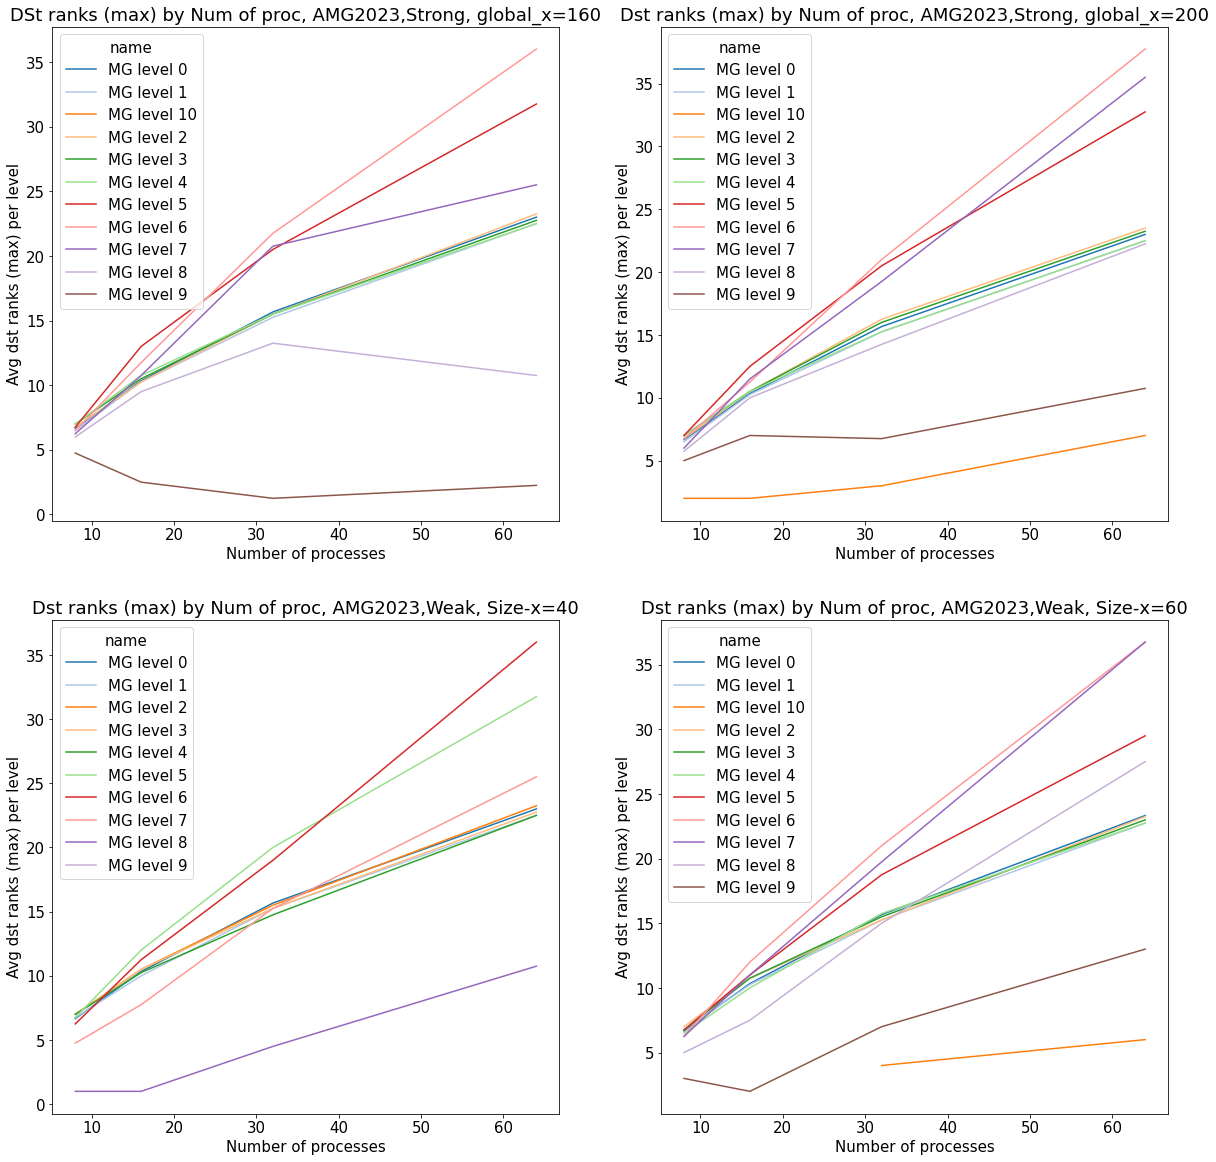

In [147]:
import seaborn as sns
import matplotlib.pyplot as plt


amg_node_weak = filtered_tk_amg_halo_weak_appended.dataframe[["avg_dst_ranks", "mpi.world.size", "Size-x", "name"]].dropna()
amg_node_strong = filtered_tk_amg_halo_appended.dataframe[["avg_dst_ranks", "mpi.world.size", "global_x", "name"]].dropna()

filtered_data_weak60 = amg_node_weak[amg_node_weak['Size-x'] == 60]
filtered_data_weak40 = amg_node_weak[amg_node_weak['Size-x'] == 40]

filtered_data_strong120 = amg_node_strong[amg_node_strong['global_x'] == 120]
filtered_data_strong160 = amg_node_strong[amg_node_strong['global_x'] == 160]
filtered_data_strong200 = amg_node_strong[amg_node_strong['global_x'] == 200]


#kripke_node_weak = filtered_tk_kripke_weak.dataframe.loc[filtered_tk_kripke_weak.get_node("halo_exchange")]

#amg_node_strong = filtered_tk_amg_halo.dataframe.loc[filtered_tk_amg_halo.get_node("halo_exchange")]
#kripke_node_strong = filtered_tk_kripke.dataframe.loc[filtered_tk_kripke.get_node("halo_exchange")]
plt.figure(figsize=(20, 20))

#df_strong = kripke_node_strong.append(amg_node_strong, ignore_index=True)
#df_weak = kripke_node_weak.append(amg_node_weak, ignore_index=True)

fig, ax = plt.subplots(2,2, figsize=(20, 20), sharey=False)

#sns.lineplot(data=amg_node_strong, x='mpi.world.size', ax=ax[0], y='Src ranks (max)', hue="global_x")
#sns.lineplot(data=kripke_node_strong, x='mpi.world.size', ax=ax[0], y='Src ranks (max)', linestyle="--")
#sns.lineplot(data=amg_node_weak, x='mpi.world.size', ax=ax[1], y='avg_src_ranks', style="Size-x", hue="name", palette=sns.color_palette("tab20", n_colors=11))
sns.lineplot(data=filtered_data_strong160, x='mpi.world.size', ax=ax[0,0], y='avg_dst_ranks', hue="name", palette=sns.color_palette("tab20", n_colors=11))
sns.lineplot(data=filtered_data_strong200, x='mpi.world.size', ax=ax[0,1], y='avg_dst_ranks', hue="name", palette=sns.color_palette("tab20", n_colors=11))

#sns.lineplot(data=filtered_data_strong120, x='mpi.world.size', ax=ax[0,0], y='avg_src_ranks', hue="name", palette=sns.color_palette("tab20", n_colors=11))
#sns.lineplot(data=amg_node_strong, x='mpi.world.size', ax=ax[0,1], y='avg_src_ranks', style="global_x", hue="name", palette=sns.color_palette("tab20", n_colors=11))
sns.lineplot(data=filtered_data_weak60, x='mpi.world.size', ax=ax[1,1], y='avg_dst_ranks', hue="name", palette=sns.color_palette("tab20", n_colors=11))
sns.lineplot(data=filtered_data_weak40, x='mpi.world.size', ax=ax[1,0], y='avg_dst_ranks', hue="name", palette=sns.color_palette("tab20", n_colors=10))
#sns.lineplot(data=amg_node_weak, x='mpi.world.size', ax=ax[1,1], y='avg_src_ranks', style="Size-x", hue="name", palette=sns.color_palette("tab20", n_colors=11))



#sns.lineplot(data=kripke_node_weak, x='mpi.world.size', ax=ax[1], y='Src ranks (max)', linestyle="--")

#sns.lineplot(data=amg_node_weak, ax=ax[0], x='mpi.world.size', y='Avg Time Per Loop', linestyle="--", hue="Size-x")
#sns.lineplot(data=amg_node_strong, ax=ax[0], x='mpi.world.size', y='Avg Time Per Loop', hue="global_x")


ax[0,0].set_title('DSt ranks (max) by Num of proc, AMG2023,Strong, global_x=160')
ax[0,1].set_title('Dst ranks (max) by Num of proc, AMG2023,Strong, global_x=200')
ax[1,1].set_title('Dst ranks (max) by Num of proc, AMG2023,Weak, Size-x=60')
ax[1,0].set_title('Dst ranks (max) by Num of proc, AMG2023,Weak, Size-x=40')
ax[0,0].set_xlabel('Number of processes')
ax[0,1].set_xlabel('Number of processes')
ax[1,0].set_xlabel('Number of processes')
ax[1,1].set_xlabel('Number of processes')

ax[0,0].set_ylabel('Avg dst ranks (max) per level')
ax[0,1].set_ylabel('Avg dst ranks (max) per level')
ax[1,0].set_ylabel('Avg dst ranks (max) per level')
ax[1,1].set_ylabel('Avg dst ranks (max) per level')
#plt.ylabel('avg_src_ranks')
#ax[0].set_xscale("log", base=2)
#ax[1].set_xscale("log", base=2)

# Display the plot
plt.show()

fig.savefig("dst_ranks AMG.png", facecolor='white', transparent=False)

# Both Src and Dst, 160, 40

<Figure size 1440x1440 with 0 Axes>

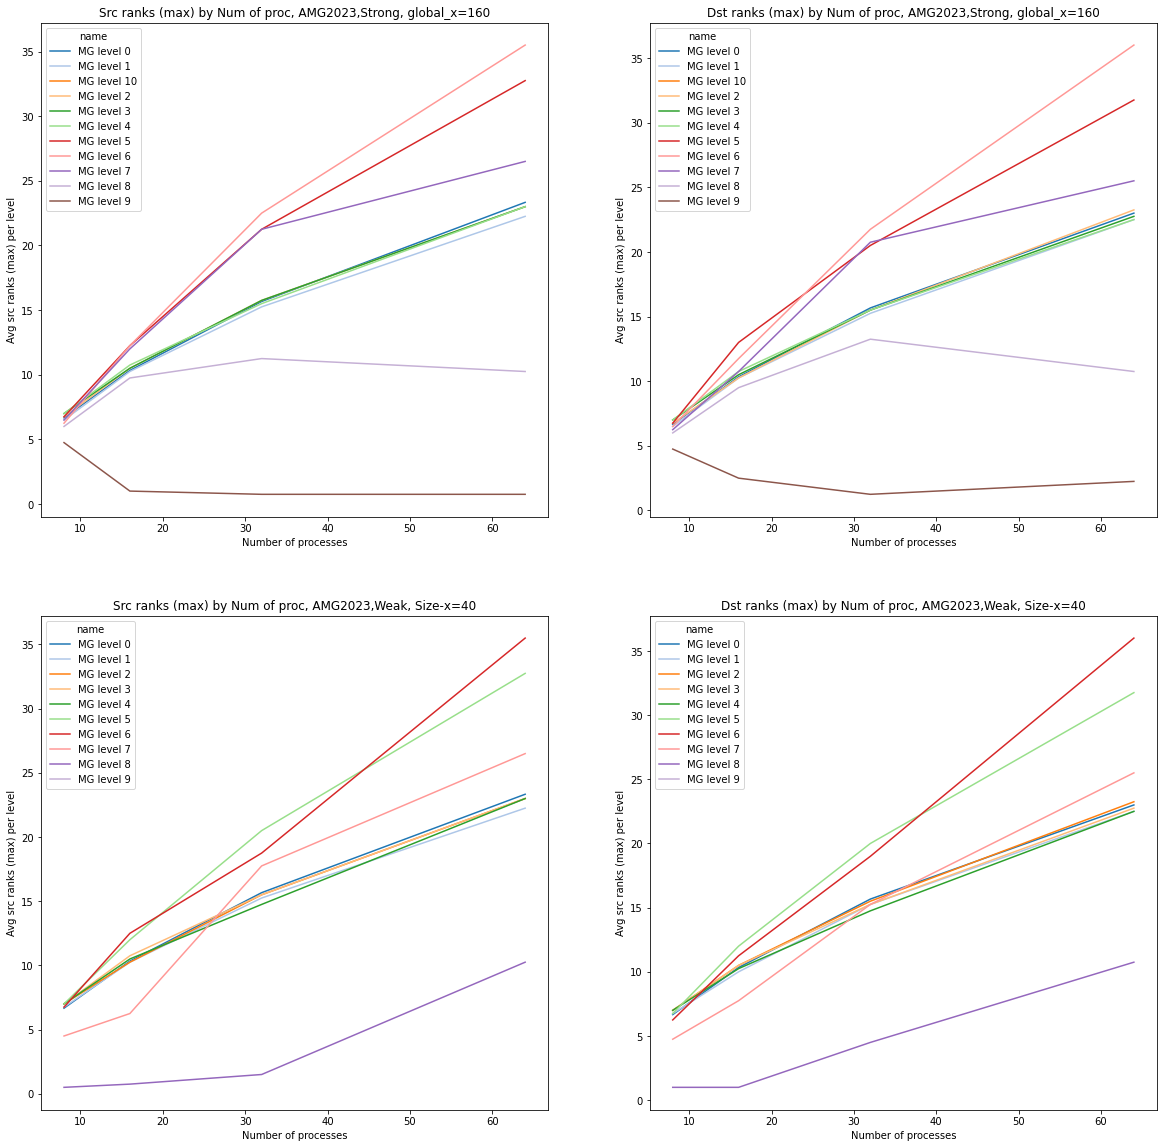

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt


amg_node_weak = filtered_tk_amg_halo_weak_appended.dataframe[["avg_src_ranks", "mpi.world.size", "Size-x", "name"]].dropna()
amg_node_strong = filtered_tk_amg_halo_appended.dataframe[["avg_src_ranks", "mpi.world.size", "global_x", "name"]].dropna()

amg_node_weak_dst = filtered_tk_amg_halo_weak_appended.dataframe[["avg_dst_ranks", "mpi.world.size", "Size-x", "name"]].dropna()
amg_node_strong_dst = filtered_tk_amg_halo_appended.dataframe[["avg_dst_ranks", "mpi.world.size", "global_x", "name"]].dropna()

filtered_data_weak60 = amg_node_weak[amg_node_weak['Size-x'] == 60]
filtered_data_weak40 = amg_node_weak[amg_node_weak['Size-x'] == 40]

filtered_data_strong120 = amg_node_strong[amg_node_strong['global_x'] == 120]
filtered_data_strong160 = amg_node_strong[amg_node_strong['global_x'] == 160]
filtered_data_strong200 = amg_node_strong[amg_node_strong['global_x'] == 200]


filtered_data_weak60_dst = amg_node_weak_dst[amg_node_weak['Size-x'] == 60]
filtered_data_weak40_dst = amg_node_weak_dst[amg_node_weak['Size-x'] == 40]

filtered_data_strong120_dst = amg_node_strong_dst[amg_node_strong['global_x'] == 120]
filtered_data_strong160_dst = amg_node_strong_dst[amg_node_strong['global_x'] == 160]
filtered_data_strong200_dst = amg_node_strong_dst[amg_node_strong['global_x'] == 200]

#kripke_node_weak = filtered_tk_kripke_weak.dataframe.loc[filtered_tk_kripke_weak.get_node("halo_exchange")]

#amg_node_strong = filtered_tk_amg_halo.dataframe.loc[filtered_tk_amg_halo.get_node("halo_exchange")]
#kripke_node_strong = filtered_tk_kripke.dataframe.loc[filtered_tk_kripke.get_node("halo_exchange")]
plt.figure(figsize=(20, 20))

#df_strong = kripke_node_strong.append(amg_node_strong, ignore_index=True)
#df_weak = kripke_node_weak.append(amg_node_weak, ignore_index=True)

fig, ax = plt.subplots(2,2, figsize=(20, 20), sharey=False)

#sns.lineplot(data=amg_node_strong, x='mpi.world.size', ax=ax[0], y='Src ranks (max)', hue="global_x")
#sns.lineplot(data=kripke_node_strong, x='mpi.world.size', ax=ax[0], y='Src ranks (max)', linestyle="--")
#sns.lineplot(data=amg_node_weak, x='mpi.world.size', ax=ax[1], y='avg_src_ranks', style="Size-x", hue="name", palette=sns.color_palette("tab20", n_colors=11))
sns.lineplot(data=filtered_data_strong160, x='mpi.world.size', ax=ax[0,0], y='avg_src_ranks', hue="name", palette=sns.color_palette("tab20", n_colors=11))
sns.lineplot(data=filtered_data_strong160_dst, x='mpi.world.size', ax=ax[0,1], y='avg_dst_ranks', hue="name", palette=sns.color_palette("tab20", n_colors=11))

#sns.lineplot(data=filtered_data_strong120, x='mpi.world.size', ax=ax[0,0], y='avg_src_ranks', hue="name", palette=sns.color_palette("tab20", n_colors=11))
#sns.lineplot(data=amg_node_strong, x='mpi.world.size', ax=ax[0,1], y='avg_src_ranks', style="global_x", hue="name", palette=sns.color_palette("tab20", n_colors=11))
sns.lineplot(data=filtered_data_weak40, x='mpi.world.size', ax=ax[1,0], y='avg_src_ranks', hue="name", palette=sns.color_palette("tab20", n_colors=10))
sns.lineplot(data=filtered_data_weak40_dst, x='mpi.world.size', ax=ax[1,1], y='avg_dst_ranks', hue="name", palette=sns.color_palette("tab20", n_colors=10))

#sns.lineplot(data=amg_node_weak, x='mpi.world.size', ax=ax[1,1], y='avg_src_ranks', style="Size-x", hue="name", palette=sns.color_palette("tab20", n_colors=11))



#sns.lineplot(data=kripke_node_weak, x='mpi.world.size', ax=ax[1], y='Src ranks (max)', linestyle="--")

#sns.lineplot(data=amg_node_weak, ax=ax[0], x='mpi.world.size', y='Avg Time Per Loop', linestyle="--", hue="Size-x")
#sns.lineplot(data=amg_node_strong, ax=ax[0], x='mpi.world.size', y='Avg Time Per Loop', hue="global_x")


ax[0,0].set_title('Src ranks (max) by Num of proc, AMG2023,Strong, global_x=160')
ax[0,1].set_title('Dst ranks (max) by Num of proc, AMG2023,Strong, global_x=160')
ax[1,0].set_title('Src ranks (max) by Num of proc, AMG2023,Weak, Size-x=40')
ax[1,1].set_title('Dst ranks (max) by Num of proc, AMG2023,Weak, Size-x=40')

ax[0,0].set_xlabel('Number of processes')
ax[0,1].set_xlabel('Number of processes')
ax[1,0].set_xlabel('Number of processes')
ax[1,1].set_xlabel('Number of processes')

ax[0,0].set_ylabel('Avg src ranks (max) per level')
ax[0,1].set_ylabel('Avg src ranks (max) per level')
ax[1,0].set_ylabel('Avg src ranks (max) per level')
ax[1,1].set_ylabel('Avg src ranks (max) per level')
#plt.ylabel('avg_src_ranks')
#ax[0].set_xscale("log", base=2)
#ax[1].set_xscale("log", base=2)

# Display the plot
plt.show()

fig.savefig("src_ranks AMG_both.png", facecolor='white', transparent=False)

ValueError: The palette list has the wrong number of colors.

<Figure size 1440x720 with 0 Axes>

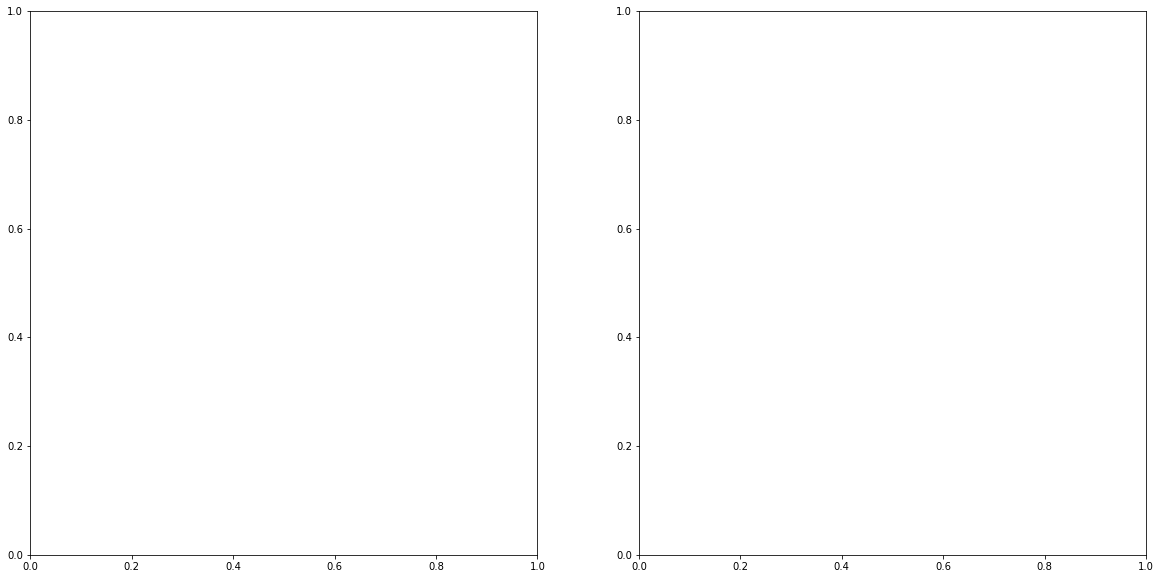

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt


amg_node_weak = filtered_tk_amg_halo_weak_appended.dataframe[["avg_src_ranks", "mpi.world.size", "Size-x", "name"]].dropna()
amg_node_strong = filtered_tk_amg_halo_appended.dataframe[["avg_src_ranks", "mpi.world.size", "global_x", "name"]].dropna()

amg_node_weak_dst = filtered_tk_amg_halo_weak_appended.dataframe[["avg_dst_ranks", "mpi.world.size", "Size-x", "name"]].dropna()
amg_node_strong_dst = filtered_tk_amg_halo_appended.dataframe[["avg_dst_ranks", "mpi.world.size", "global_x", "name"]].dropna()

filtered_data_weak60 = amg_node_weak[amg_node_weak['Size-x'] == 60]
filtered_data_weak40 = amg_node_weak[amg_node_weak['Size-x'] == 40]

filtered_data_strong120 = amg_node_strong[amg_node_strong['global_x'] == 120]
filtered_data_strong160 = amg_node_strong[amg_node_strong['global_x'] == 160]
filtered_data_strong200 = amg_node_strong[amg_node_strong['global_x'] == 200]


filtered_data_weak60_dst = amg_node_weak_dst[amg_node_weak['Size-x'] == 60]
filtered_data_weak40_dst = amg_node_weak_dst[amg_node_weak['Size-x'] == 40]

filtered_data_strong120_dst = amg_node_strong_dst[amg_node_strong['global_x'] == 120]
filtered_data_strong160_dst = amg_node_strong_dst[amg_node_strong['global_x'] == 160]
filtered_data_strong200_dst = amg_node_strong_dst[amg_node_strong['global_x'] == 200]

#kripke_node_weak = filtered_tk_kripke_weak.dataframe.loc[filtered_tk_kripke_weak.get_node("halo_exchange")]

#amg_node_strong = filtered_tk_amg_halo.dataframe.loc[filtered_tk_amg_halo.get_node("halo_exchange")]
#kripke_node_strong = filtered_tk_kripke.dataframe.loc[filtered_tk_kripke.get_node("halo_exchange")]
plt.figure(figsize=(20, 10))

#df_strong = kripke_node_strong.append(amg_node_strong, ignore_index=True)
#df_weak = kripke_node_weak.append(amg_node_weak, ignore_index=True)

fig, ax = plt.subplots(1,2, figsize=(20, 10), sharey=False)

#sns.lineplot(data=amg_node_strong, x='mpi.world.size', ax=ax[0], y='Src ranks (max)', hue="global_x")
#sns.lineplot(data=kripke_node_strong, x='mpi.world.size', ax=ax[0], y='Src ranks (max)', linestyle="--")
#sns.lineplot(data=amg_node_weak, x='mpi.world.size', ax=ax[1], y='avg_src_ranks', style="Size-x", hue="name", palette=sns.color_palette("tab20", n_colors=11))
#sns.lineplot(data=filtered_data_strong160, x='mpi.world.size', ax=ax[0], y='avg_src_ranks', hue="name", palette=sns.color_palette("tab20", n_colors=9))
#sns.lineplot(data=filtered_data_strong160_dst, x='mpi.world.size', ax=ax[1], y='avg_dst_ranks', hue="name", palette=sns.color_palette("tab20", n_colors=9))

#sns.lineplot(data=filtered_data_strong120, x='mpi.world.size', ax=ax[0,0], y='avg_src_ranks', hue="name", palette=sns.color_palette("tab20", n_colors=11))
#sns.lineplot(data=amg_node_strong, x='mpi.world.size', ax=ax[0,1], y='avg_src_ranks', style="global_x", hue="name", palette=sns.color_palette("tab20", n_colors=11))
sns.lineplot(data=filtered_data_weak60, x='mpi.world.size', ax=ax[0], y='avg_src_ranks', hue="name", palette=sns.color_palette("tab20", n_colors=11))
sns.lineplot(data=filtered_data_weak60_dst, x='mpi.world.size', ax=ax[1], y='avg_dst_ranks', hue="name", palette=sns.color_palette("tab20", n_colors=11))

#sns.lineplot(data=amg_node_weak, x='mpi.world.size', ax=ax[1,1], y='avg_src_ranks', style="Size-x", hue="name", palette=sns.color_palette("tab20", n_colors=11))



#sns.lineplot(data=kripke_node_weak, x='mpi.world.size', ax=ax[1], y='Src ranks (max)', linestyle="--")

#sns.lineplot(data=amg_node_weak, ax=ax[0], x='mpi.world.size', y='Avg Time Per Loop', linestyle="--", hue="Size-x")
#sns.lineplot(data=amg_node_strong, ax=ax[0], x='mpi.world.size', y='Avg Time Per Loop', hue="global_x")


#ax[0].set_title('Src ranks(max) by Num proc,AMG2023,GPU,Strong,global_x=160')
#ax[1].set_title('Dst ranks(max) by Num proc, AMG2023,GPU,Strong,global_x=160')
ax[0].set_title('Src ranks(max) by Num proc, AMG2023,Weak, Size-x=60*60*60')
ax[1].set_title('Dst ranks(max) by Num proc, AMG2023,Weak, Size-x=60*60*60')

#ax[0].set_xlabel('Number of processes')
#ax[1].set_xlabel('Number of processes')
ax[0].set_xlabel('Number of processes')
ax[1].set_xlabel('Number of processes')

ax[0].set_ylabel('Avg src ranks (max) per level')
ax[1].set_ylabel('Avg src ranks (max) per level')
#ax[1,0].set_ylabel('Avg src ranks (max) per level')
#ax[1,1].set_ylabel('Avg src ranks (max) per level')
#plt.ylabel('avg_src_ranks')
#ax[0].set_xscale("log", base=2)
#ax[1].set_xscale("log", base=2)

# Display the plot
plt.show()

fig.savefig("src_ranks AMG_weak_60.png", facecolor='white', transparent=False)

<Figure size 1440x720 with 0 Axes>

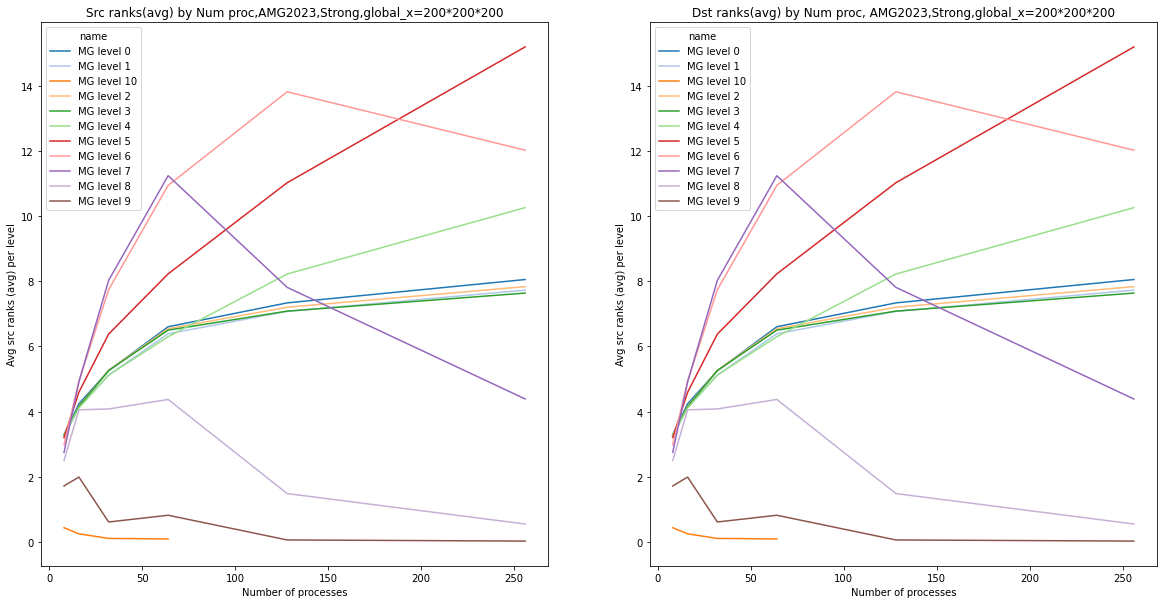

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt


amg_node_weak = filtered_tk_amg_halo_weak_appended.dataframe[["avg_src_ranks", "mpi.world.size", "Size-x", "name"]].dropna()
amg_node_strong = filtered_tk_amg_halo_appended.dataframe[["avg_src_ranks", "mpi.world.size", "global_x", "name"]].dropna()

amg_node_weak_dst = filtered_tk_amg_halo_weak_appended.dataframe[["avg_dst_ranks", "mpi.world.size", "Size-x", "name"]].dropna()
amg_node_strong_dst = filtered_tk_amg_halo_appended.dataframe[["avg_dst_ranks", "mpi.world.size", "global_x", "name"]].dropna()

filtered_data_weak60 = amg_node_weak[amg_node_weak['Size-x'] == 60]
filtered_data_weak40 = amg_node_weak[amg_node_weak['Size-x'] == 40]

filtered_data_strong120 = amg_node_strong[amg_node_strong['global_x'] == 120]
filtered_data_strong160 = amg_node_strong[amg_node_strong['global_x'] == 160]
filtered_data_strong200 = amg_node_strong[amg_node_strong['global_x'] == 200]


filtered_data_weak60_dst = amg_node_weak_dst[amg_node_weak['Size-x'] == 60]
filtered_data_weak40_dst = amg_node_weak_dst[amg_node_weak['Size-x'] == 40]

filtered_data_strong120_dst = amg_node_strong_dst[amg_node_strong['global_x'] == 120]
filtered_data_strong160_dst = amg_node_strong_dst[amg_node_strong['global_x'] == 160]
filtered_data_strong200_dst = amg_node_strong_dst[amg_node_strong['global_x'] == 200]

#kripke_node_weak = filtered_tk_kripke_weak.dataframe.loc[filtered_tk_kripke_weak.get_node("halo_exchange")]

#amg_node_strong = filtered_tk_amg_halo.dataframe.loc[filtered_tk_amg_halo.get_node("halo_exchange")]
#kripke_node_strong = filtered_tk_kripke.dataframe.loc[filtered_tk_kripke.get_node("halo_exchange")]
plt.figure(figsize=(20, 10))

#df_strong = kripke_node_strong.append(amg_node_strong, ignore_index=True)
#df_weak = kripke_node_weak.append(amg_node_weak, ignore_index=True)

fig, ax = plt.subplots(1,2, figsize=(20, 10), sharey=False)

#sns.lineplot(data=amg_node_strong, x='mpi.world.size', ax=ax[0], y='Src ranks (max)', hue="global_x")
#sns.lineplot(data=kripke_node_strong, x='mpi.world.size', ax=ax[0], y='Src ranks (max)', linestyle="--")
#sns.lineplot(data=amg_node_weak, x='mpi.world.size', ax=ax[1], y='avg_src_ranks', style="Size-x", hue="name", palette=sns.color_palette("tab20", n_colors=11))
sns.lineplot(data=filtered_data_strong200, x='mpi.world.size', ax=ax[0], y='avg_src_ranks', hue="name", palette=sns.color_palette("tab20", n_colors=11))
sns.lineplot(data=filtered_data_strong200_dst, x='mpi.world.size', ax=ax[1], y='avg_dst_ranks', hue="name", palette=sns.color_palette("tab20", n_colors=11))

#sns.lineplot(data=filtered_data_strong120, x='mpi.world.size', ax=ax[0,0], y='avg_src_ranks', hue="name", palette=sns.color_palette("tab20", n_colors=11))
#sns.lineplot(data=amg_node_strong, x='mpi.world.size', ax=ax[0,1], y='avg_src_ranks', style="global_x", hue="name", palette=sns.color_palette("tab20", n_colors=11))
#sns.lineplot(data=filtered_data_weak40, x='mpi.world.size', ax=ax[1,0], y='avg_src_ranks', hue="name", palette=sns.color_palette("tab20", n_colors=9))
#sns.lineplot(data=filtered_data_weak40_dst, x='mpi.world.size', ax=ax[1,1], y='avg_dst_ranks', hue="name", palette=sns.color_palette("tab20", n_colors=9))

#sns.lineplot(data=amg_node_weak, x='mpi.world.size', ax=ax[1,1], y='avg_src_ranks', style="Size-x", hue="name", palette=sns.color_palette("tab20", n_colors=11))



#sns.lineplot(data=kripke_node_weak, x='mpi.world.size', ax=ax[1], y='Src ranks (max)', linestyle="--")

#sns.lineplot(data=amg_node_weak, ax=ax[0], x='mpi.world.size', y='Avg Time Per Loop', linestyle="--", hue="Size-x")
#sns.lineplot(data=amg_node_strong, ax=ax[0], x='mpi.world.size', y='Avg Time Per Loop', hue="global_x")


ax[0].set_title('Src ranks(avg) by Num proc,AMG2023,Strong,global_x=200*200*200')
ax[1].set_title('Dst ranks(avg) by Num proc, AMG2023,Strong,global_x=200*200*200')
#ax[1,0].set_title('Src ranks(max) by Num proc, AMG2023,GPU,Weak, Size-x=40')
#ax[1,1].set_title('Dst ranks(max) by Num proc, AMG2023,GPU,Weak, Size-x=40')

ax[0].set_xlabel('Number of processes')
ax[1].set_xlabel('Number of processes')
#ax[1,0].set_xlabel('Number of processes')
#ax[1,1].set_xlabel('Number of processes')

ax[0].set_ylabel('Avg src ranks (avg) per level')
ax[1].set_ylabel('Avg src ranks (avg) per level')
#ax[1,0].set_ylabel('Avg src ranks (max) per level')
#ax[1,1].set_ylabel('Avg src ranks (max) per level')
#plt.ylabel('avg_src_ranks')
#ax[0].set_xscale("log", base=2)
#ax[1].set_xscale("log", base=2)

# Display the plot
plt.show()

fig.savefig("src_ranks AMG_strong_200_avg.png", facecolor='white', transparent=False)

/tmp/ipykernel_208841/3801770963.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_strong = kripke_node_strong.append(amg_node_strong, ignore_index=True)
/tmp/ipykernel_208841/3801770963.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_weak = kripke_node_weak.append(amg_node_weak, ignore_index=True)


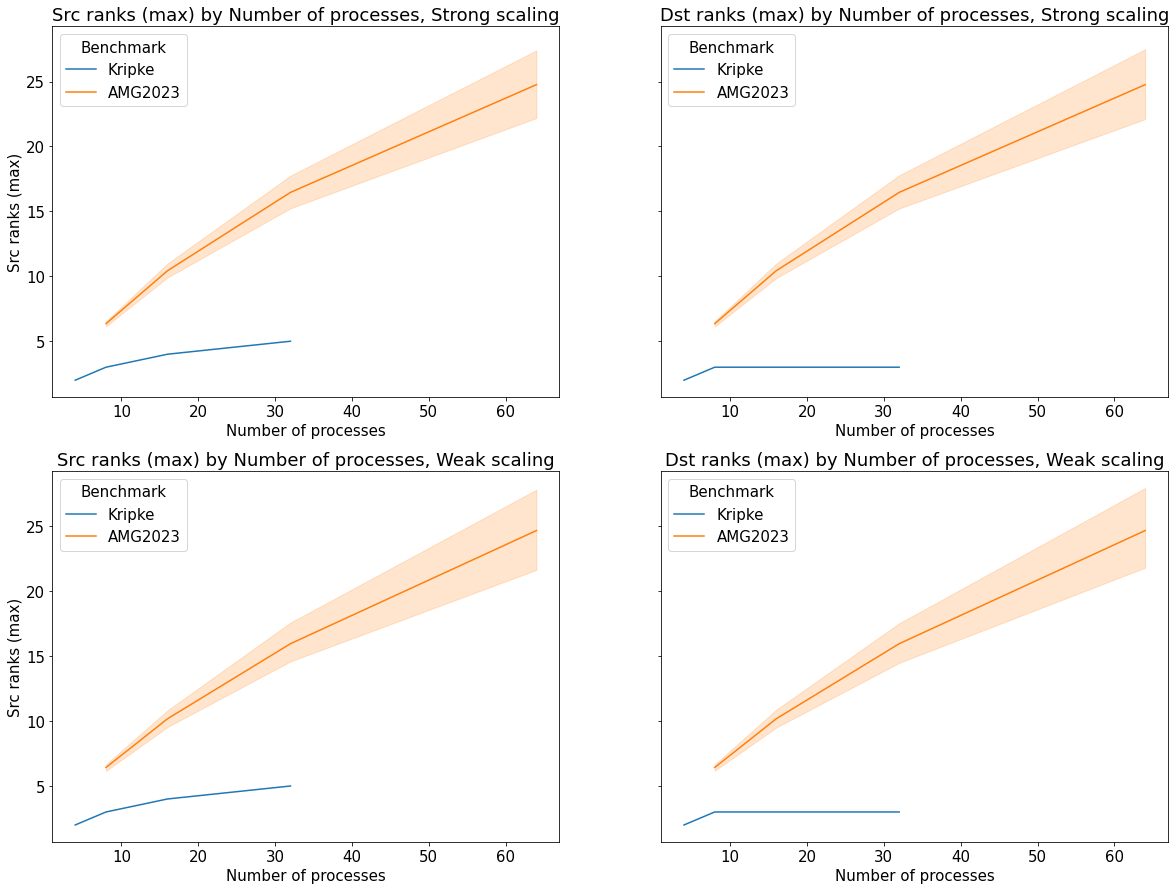

<Figure size 432x288 with 0 Axes>

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt


amg_node_weak = filtered_tk_amg_halo_weak.dataframe.loc[filtered_tk_amg_halo_weak.get_node("halo_exchange")]
kripke_node_weak = filtered_tk_kripke_weak.dataframe.loc[filtered_tk_kripke_weak.get_node("halo_exchange")]

amg_node_strong = filtered_tk_amg_halo.dataframe.loc[filtered_tk_amg_halo.get_node("halo_exchange")]
kripke_node_strong = filtered_tk_kripke.dataframe.loc[filtered_tk_kripke.get_node("halo_exchange")]
#plt.figure(figsize=(20, 10))

df_strong = kripke_node_strong.append(amg_node_strong, ignore_index=True)
df_weak = kripke_node_weak.append(amg_node_weak, ignore_index=True)

fig, ax = plt.subplots(2,2, figsize=(20, 15), sharey=True)

sns.lineplot(data=df_strong, x='mpi.world.size', ax=ax[0,0], y='Src ranks (max)', hue="Benchmark")
#sns.lineplot(data=df_weak, x='mpi.world.size', ax=ax[0,1], y='Src ranks (max)', hue="Benchmark")
sns.lineplot(data=df_strong, x='mpi.world.size', ax=ax[0,1], y='Dst ranks (max)', hue="Benchmark")
#sns.lineplot(data=df_weak, x='mpi.world.size', ax=ax[1,1], y='Dst ranks (max)', hue="Benchmark")
sns.lineplot(data=df_weak, x='mpi.world.size', ax=ax[1,0], y='Src ranks (max)', hue="Benchmark")
sns.lineplot(data=df_weak, x='mpi.world.size', ax=ax[1,1], y='Dst ranks (max)', hue="Benchmark")

ax[0,0].set_title('Src ranks (max) by Number of processes, Strong scaling')
#ax[0, 1].set_title('Src ranks (max) by Number of processes, Weak scaling')
ax[0,1].set_title('Dst ranks (max) by Number of processes, Strong scaling')
ax[1, 0].set_title('Src ranks (max) by Number of processes, Weak scaling')
ax[1,1].set_title('Dst ranks (max) by Number of processes, Weak scaling')
ax[0,0].set_xlabel('Number of processes')
ax[0,1].set_xlabel('Number of processes')
ax[1,0].set_xlabel('Number of processes')
ax[1,1].set_xlabel('Number of processes')
plt.ylabel('Src ranks (max)')
#ax[0].set_xscale("log", base=2)
#ax[1].set_xscale("log", base=2)

# Display the plot
plt.show()
plt.savefig("Src_Dst_ranks AMG_Kripke.png")

# Plots for Bytes sent (max)

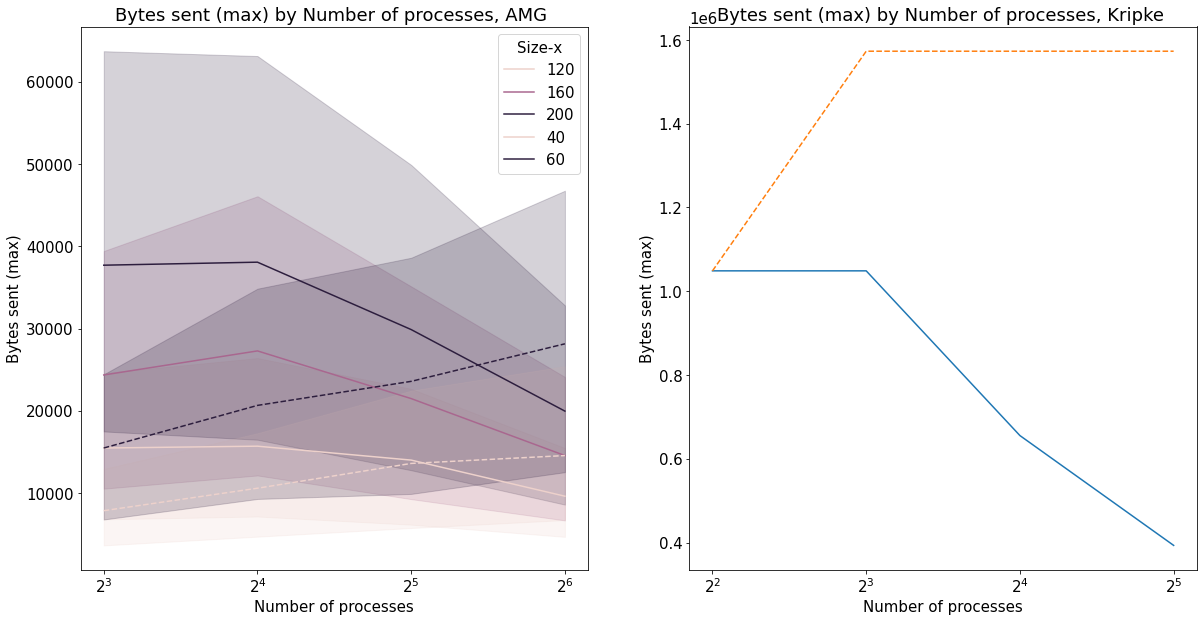

<Figure size 432x288 with 0 Axes>

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

amg_node_weak = filtered_tk_amg_halo_weak.dataframe.loc[filtered_tk_amg_halo_weak.get_node("halo_exchange")]
kripke_node_weak = filtered_tk_kripke_weak.dataframe.loc[filtered_tk_kripke_weak.get_node("halo_exchange")]

amg_node_strong = filtered_tk_amg_halo.dataframe.loc[filtered_tk_amg_halo.get_node("halo_exchange")]
kripke_node_strong = filtered_tk_kripke.dataframe.loc[filtered_tk_kripke.get_node("halo_exchange")]
fig, ax = plt.subplots(1,2, figsize=(20, 10), sharey=False)

#df_amg = amg_node_weak.append(amg_node_strong, ignore_index=True)
#df_kripke = kripke_node_weak.append(kripke_node_strong, ignore_index=True)

#sns.lineplot(data=df_amg, x='mpi.world.size', ax=ax[0], y='Bytes sent (max)', hue="Scaling")
#sns.lineplot(data=df_kripke, x='mpi.world.size', ax=ax[1], y='Bytes sent (max)', hue="Scaling")

sns.lineplot(data=amg_node_strong, x='mpi.world.size', ax=ax[0], y='Bytes sent (max)', hue="global_x")
sns.lineplot(data=amg_node_weak, x='mpi.world.size', ax=ax[0], y='Bytes sent (max)', hue="Size-x", linestyle="--")
sns.lineplot(data=kripke_node_strong, x='mpi.world.size', ax=ax[1], y='Bytes sent (max)')
sns.lineplot(data=kripke_node_weak, x='mpi.world.size', ax=ax[1], y='Bytes sent (max)', linestyle="--")


ax[0].set_title('Bytes sent (max) by Number of processes, AMG ')
ax[1].set_title('Bytes sent (max) by Number of processes, Kripke ')
ax[0].set_xlabel('Number of processes')
ax[1].set_xlabel('Number of processes')
plt.ylabel('Bytes sent (max)')
ax[0].set_xscale("log", base=2)
ax[1].set_xscale("log", base=2)

# Display the plot
plt.show()
plt.savefig("Bytes sent (max) AMG_Kripke.svg")

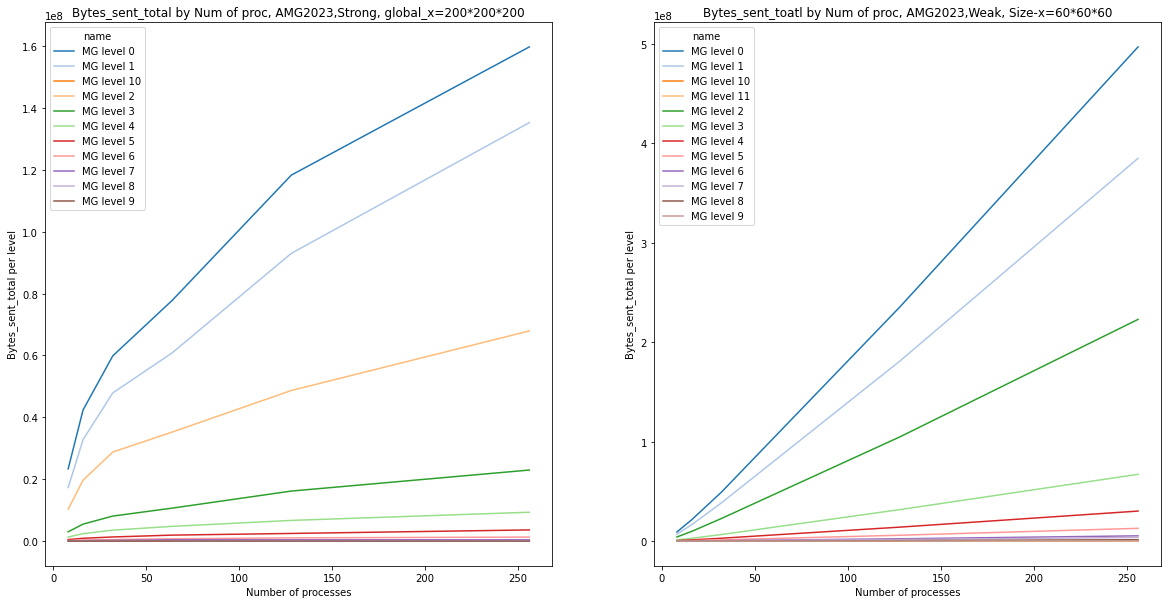

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

#amg_node_weak = filtered_tk_amg_halo_weak.dataframe.loc[filtered_tk_amg_halo_weak.get_node("halo_exchange")]
#kripke_node_weak = filtered_tk_kripke_weak.dataframe.loc[filtered_tk_kripke_weak.get_node("halo_exchange")]

amg_node_weak = filtered_tk_amg_halo_weak_appended.dataframe[["avg_Bytes_sent_total", "mpi.world.size", "Size-x", "name"]].dropna()
amg_node_strong = filtered_tk_amg_halo_appended.dataframe[["avg_Bytes_sent_total", "mpi.world.size", "global_x", "name"]].dropna()


filtered_data_weak60 = amg_node_weak[amg_node_weak['Size-x'] == 60]
filtered_data_weak40 = amg_node_weak[amg_node_weak['Size-x'] == 40]

filtered_data_strong120 = amg_node_strong[amg_node_strong['global_x'] == 120]
filtered_data_strong160 = amg_node_strong[amg_node_strong['global_x'] == 160]
filtered_data_strong200 = amg_node_strong[amg_node_strong['global_x'] == 200]

#amg_node_strong = filtered_tk_amg_halo.dataframe.loc[filtered_tk_amg_halo.get_node("halo_exchange")]
#kripke_node_strong = filtered_tk_kripke.dataframe.loc[filtered_tk_kripke.get_node("halo_exchange")]
fig, ax = plt.subplots(1,2, figsize=(20, 10), sharey=False)

#df_amg = amg_node_weak.append(amg_node_strong, ignore_index=True)
#df_kripke = kripke_node_weak.append(kripke_node_strong, ignore_index=True)

#sns.lineplot(data=df_amg, x='mpi.world.size', ax=ax[0], y='Bytes sent (max)', hue="Scaling")
#sns.lineplot(data=df_kripke, x='mpi.world.size', ax=ax[1], y='Bytes sent (max)', hue="Scaling")

#sns.lineplot(data=amg_node_strong, x='mpi.world.size', ax=ax[0], y='Bytes sent (max)', hue="global_x")
#sns.lineplot(data=amg_node_weak, x='mpi.world.size', ax=ax[1], y='Bytes sent (max)', hue="Size-x")

#sns.lineplot(data=filtered_data_strong160, x='mpi.world.size', ax=ax[0,0], y='avg_Bytes_sent_max', hue="name", palette=sns.color_palette("tab20", n_colors=11))
sns.lineplot(data=filtered_data_strong200, x='mpi.world.size', ax=ax[0], y='avg_Bytes_sent_total', hue="name", palette=sns.color_palette("tab20", n_colors=11))

#sns.lineplot(data=filtered_data_strong120, x='mpi.world.size', ax=ax[0,0], y='avg_src_ranks', hue="name", palette=sns.color_palette("tab20", n_colors=11))
#sns.lineplot(data=amg_node_strong, x='mpi.world.size', ax=ax[0,1], y='avg_src_ranks', style="global_x", hue="name", palette=sns.color_palette("tab20", n_colors=11))
sns.lineplot(data=filtered_data_weak60, x='mpi.world.size', ax=ax[1], y='avg_Bytes_sent_total', hue="name", palette=sns.color_palette("tab20", n_colors=12))
#sns.lineplot(data=filtered_data_weak40, x='mpi.world.size', ax=ax[1,0], y='avg_Bytes_sent_max', hue="name", palette=sns.color_palette("tab20", n_colors=10))

#sns.lineplot(data=amg_node_weak, x='mpi.world.size', ax=ax[1], y='avg_Bytes_sent_max', style="Size-x", hue="name", palette=sns.color_palette("tab20", n_colors=11))
#sns.lineplot(data=amg_node_strong, x='mpi.world.size', ax=ax[0], y='avg_Bytes_sent_max', style="global_x", hue="name", palette=sns.color_palette("tab20", n_colors=11))

#sns.lineplot(data=kripke_node_strong, x='mpi.world.size', ax=ax[1], y='Bytes sent (max)')
#sns.lineplot(data=kripke_node_weak, x='mpi.world.size', ax=ax[1], y='Bytes sent (max)', linestyle="--")


ax[0].set_title('Bytes_sent_total by Num of proc, AMG2023,Strong, global_x=200*200*200')
#ax[0,1].set_title('Bytes_sent_max by Num of proc, AMG2023,Strong, global_x=200')
ax[1].set_title('Bytes_sent_toatl by Num of proc, AMG2023,Weak, Size-x=60*60*60')
#ax[1,0].set_title('Bytes_sent_max) by Num of proc, AMG2023,Weak, Size-x=40')
ax[0].set_xlabel('Number of processes')
ax[1].set_xlabel('Number of processes')
#ax[1,0].set_xlabel('Number of processes')
#ax[1,1].set_xlabel('Number of processes')

ax[0].set_ylabel('Bytes_sent_total per level')
ax[1].set_ylabel('Bytes_sent_total per level')
#ax[1,0].set_ylabel('Bytes_sent_max per level')
#ax[0].set_xscale("log", base=2)
#ax[1].set_xscale("log", base=2)

# Display the plot
plt.show()
fig.savefig("Bytes sent (toatl) AMG_w_s_200_60.png", facecolor='white', transparent=False)

# Number of collectives 

In [ ]:
print(tk_kripke.dataframe["Coll (max)"])

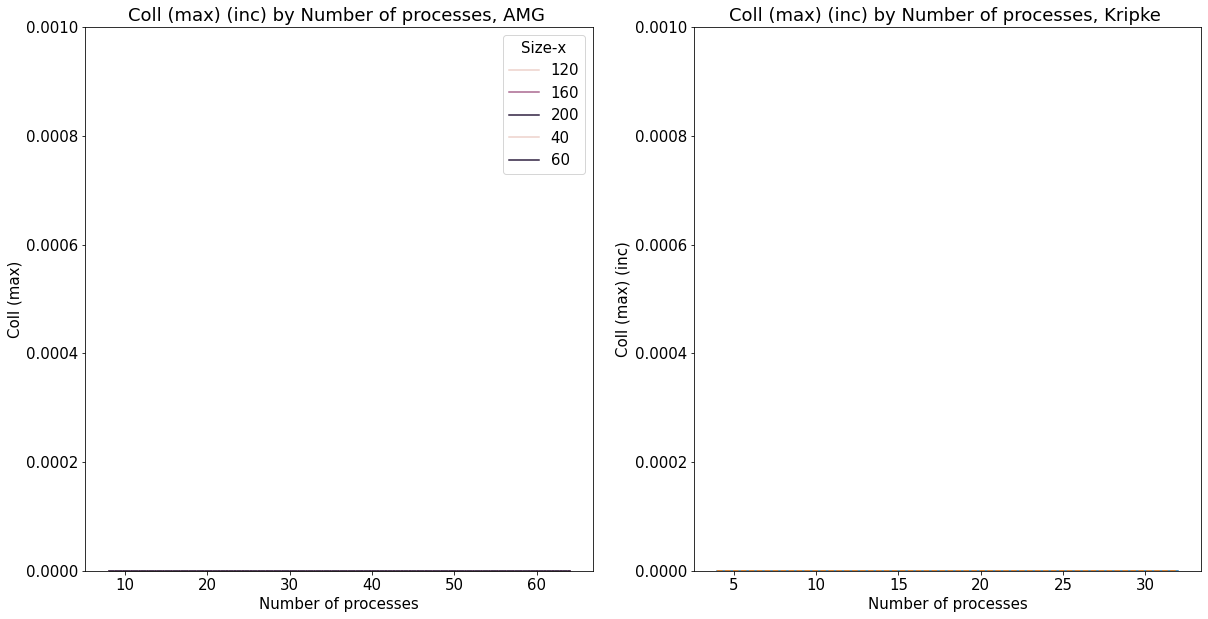

<Figure size 432x288 with 0 Axes>

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt

amg_node_weak = filtered_tk_amg_halo_weak.dataframe.loc[filtered_tk_amg_halo_weak.get_node("halo_exchange")]
kripke_node_weak = filtered_tk_kripke_weak.dataframe.loc[filtered_tk_kripke_weak.get_node("halo_exchange")]

amg_node_strong = filtered_tk_amg_halo.dataframe.loc[filtered_tk_amg_halo.get_node("halo_exchange")]
kripke_node_strong = filtered_tk_kripke.dataframe.loc[filtered_tk_kripke.get_node("halo_exchange")]
fig, ax = plt.subplots(1,2, figsize=(20, 10), sharey=False)

#df_amg = amg_node_weak.append(amg_node_strong, ignore_index=True)
#df_kripke = kripke_node_weak.append(kripke_node_strong, ignore_index=True)

#sns.lineplot(data=df_amg, x='mpi.world.size', ax=ax[0], y='Bytes sent (max)', hue="Scaling")
#sns.lineplot(data=df_kripke, x='mpi.world.size', ax=ax[1], y='Bytes sent (max)', hue="Scaling")

sns.lineplot(data=amg_node_strong, x='mpi.world.size', ax=ax[0], y='Coll (max)', hue="global_x")
sns.lineplot(data=amg_node_weak, x='mpi.world.size', ax=ax[0], y='Coll (max)', hue="Size-x", linestyle="--")
sns.lineplot(data=kripke_node_strong, x='mpi.world.size', ax=ax[1], y='Coll (max)')
sns.lineplot(data=kripke_node_weak, x='mpi.world.size', ax=ax[1], y='Coll (max)', linestyle="--")

ax[0].set(ylim=(0, 0.001))
ax[1].set(ylim=(0, 0.001))
ax[0].set_title('Coll (max) (inc) by Number of processes, AMG ')
ax[1].set_title('Coll (max) (inc) by Number of processes, Kripke ')
ax[0].set_xlabel('Number of processes')
ax[1].set_xlabel('Number of processes')
plt.ylabel('Coll (max) (inc)')
#ax[0].set_xscale("log", base=2)
#ax[1].set_xscale("log", base=2)

# Display the plot
plt.show()
plt.savefig("Coll (max) (inc) AMG_Kripke.svg")

# Plot for Dst ranks (max)

/tmp/ipykernel_3545092/546132545.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_strong = kripke_node_strong.append(amg_node_strong, ignore_index=True)
/tmp/ipykernel_3545092/546132545.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_weak = kripke_node_weak.append(amg_node_weak, ignore_index=True)


<Figure size 1440x720 with 0 Axes>

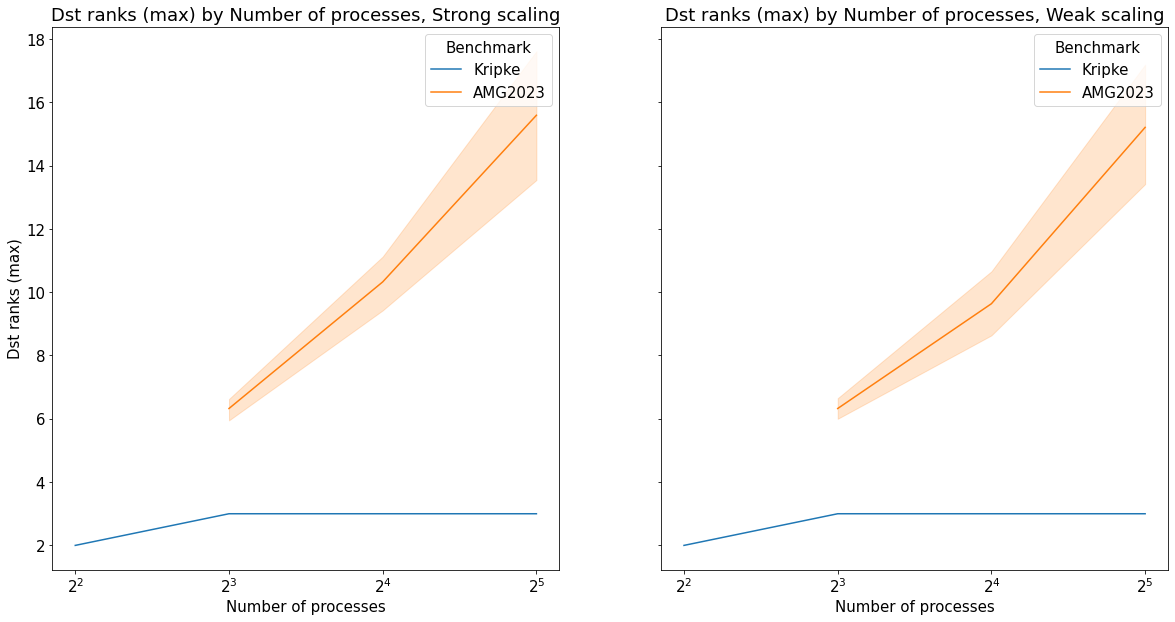

<Figure size 432x288 with 0 Axes>

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt


amg_node_weak = filtered_tk_amg_halo_weak.dataframe.loc[filtered_tk_amg_halo_weak.get_node("halo_exchange")]
kripke_node_weak = filtered_tk_kripke_weak.dataframe.loc[filtered_tk_kripke_weak.get_node("halo_exchange")]

amg_node_strong = filtered_tk_amg_halo.dataframe.loc[filtered_tk_amg_halo.get_node("halo_exchange")]
kripke_node_strong = filtered_tk_kripke.dataframe.loc[filtered_tk_kripke.get_node("halo_exchange")]
plt.figure(figsize=(20, 10))

df_strong = kripke_node_strong.append(amg_node_strong, ignore_index=True)
df_weak = kripke_node_weak.append(amg_node_weak, ignore_index=True)

fig, ax = plt.subplots(1,2, figsize=(20, 10), sharey=True)

sns.lineplot(data=df_strong, x='mpi.world.size', ax=ax[0], y='Dst ranks (max)', hue="Benchmark")
sns.lineplot(data=df_weak, x='mpi.world.size', ax=ax[1], y='Dst ranks (max)', hue="Benchmark")


ax[0].set_title('Dst ranks (max) by Number of processes, Strong scaling')
ax[1].set_title('Dst ranks (max) by Number of processes, Weak scaling')
ax[0].set_xlabel('Number of processes')
ax[1].set_xlabel('Number of processes')
plt.ylabel('Dst ranks (max)')
ax[0].set_xscale("log", base=2)
ax[1].set_xscale("log", base=2)

# Display the plot
plt.show()
plt.savefig("Dst ranks AMG_Kripke.svg")

In [119]:
# print(df_amg["Bytes sent (max)"])

# AMG2023 PROBLEM 2

# Avg time per loop

/tmp/ipykernel_3888681/2796400989.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_amg = amg_node_weak.append(amg_node_strong, ignore_index=True)
/tmp/ipykernel_3888681/2796400989.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_kripke = kripke_node_weak.append(kripke_node_strong, ignore_index=True)


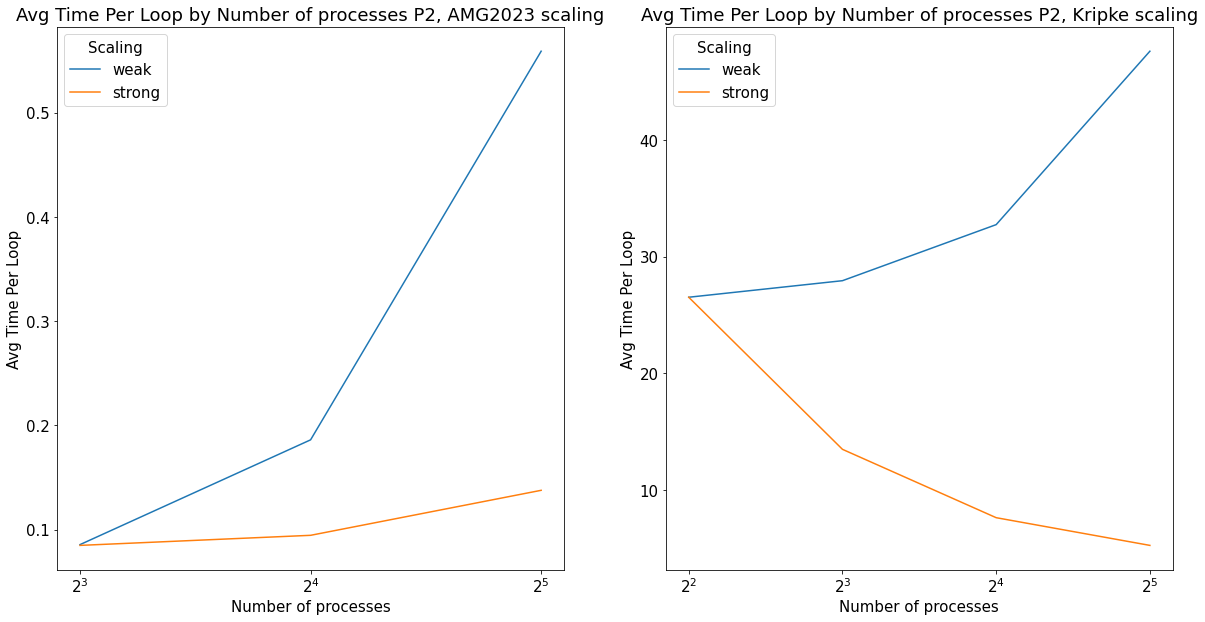

<Figure size 432x288 with 0 Axes>

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 15})

amg_node_weak = filtered_tk_amg_halo_weak.dataframe.loc[filtered_tk_amg_halo_weak.get_node("hypre_BoomerAMGSolve")]
kripke_node_weak = filtered_tk_kripke_weak.dataframe.loc[filtered_tk_kripke_weak.get_node("solve")]

amg_node_strong = filtered_tk_amg_halo.dataframe.loc[filtered_tk_amg_halo.get_node("hypre_BoomerAMGSolve")]
kripke_node_strong = filtered_tk_kripke.dataframe.loc[filtered_tk_kripke.get_node("solve")]

df_amg = amg_node_weak.append(amg_node_strong, ignore_index=True)
df_kripke = kripke_node_weak.append(kripke_node_strong, ignore_index=True)
#df_strong = filtered_tk_amg_halo.dataframe.append(filtered_tk_kripke.dataframe, ignore_index=True)
#print(df)
fig, ax = plt.subplots(1,2, figsize=(20, 10), sharey=False)
sns.lineplot(data=df_amg, ax=ax[0], x='mpi.world.size', y='Avg Time Per Loop', hue="Scaling")
sns.lineplot(data=df_kripke, ax=ax[1], x='mpi.world.size', y='Avg Time Per Loop', hue="Scaling")

ax[0].set_title('Avg Time Per Loop by Number of processes P2, AMG2023 scaling')
ax[1].set_title('Avg Time Per Loop by Number of processes P2, Kripke scaling')
plt.xlabel('Number of processes')
plt.ylabel('Avg Time Per Loop')
ax[0].set_xscale("log", base=2)
ax[1].set_xscale("log", base=2)
ax[0].set_xlabel('Number of processes')
ax[1].set_xlabel('Number of processes')
# Display the plot
plt.show()
plt.savefig("Avg Time Per Loop_problem2.png")

# Src ranks

/tmp/ipykernel_3888681/301402833.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_strong = kripke_node_strong.append(amg_node_strong, ignore_index=True)
/tmp/ipykernel_3888681/301402833.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_weak = kripke_node_weak.append(amg_node_weak, ignore_index=True)


<Figure size 1440x720 with 0 Axes>

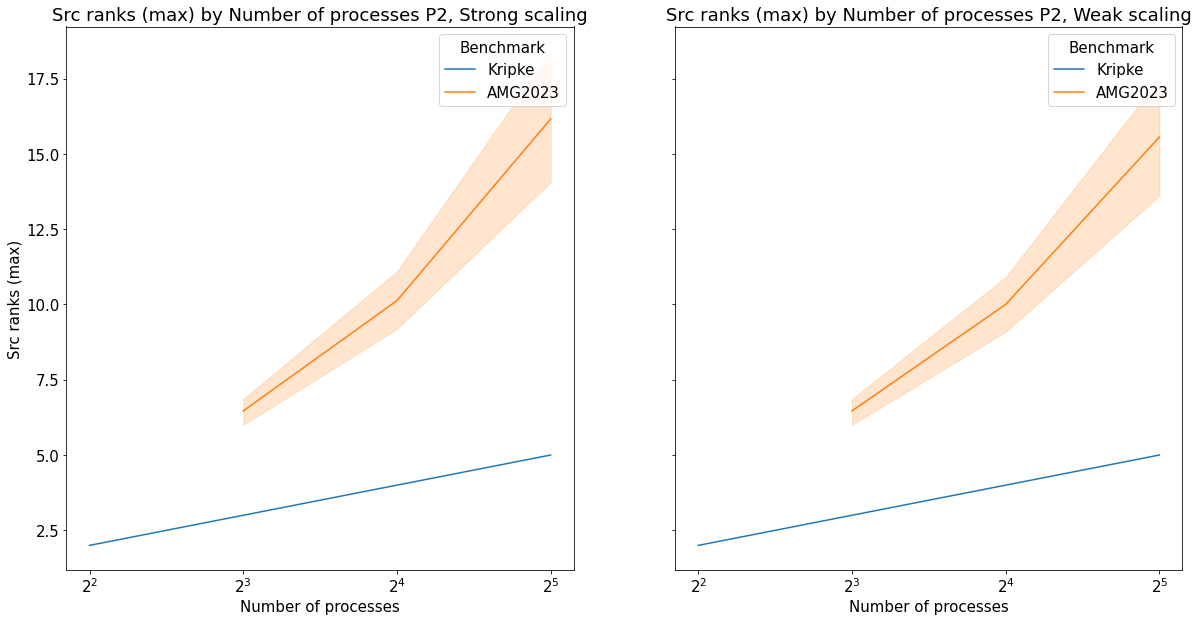

<Figure size 432x288 with 0 Axes>

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt


amg_node_weak = filtered_tk_amg_halo_weak.dataframe.loc[filtered_tk_amg_halo_weak.get_node("halo_exchange")]
kripke_node_weak = filtered_tk_kripke_weak.dataframe.loc[filtered_tk_kripke_weak.get_node("halo_exchange")]

amg_node_strong = filtered_tk_amg_halo.dataframe.loc[filtered_tk_amg_halo.get_node("halo_exchange")]
kripke_node_strong = filtered_tk_kripke.dataframe.loc[filtered_tk_kripke.get_node("halo_exchange")]
plt.figure(figsize=(20, 10))

df_strong = kripke_node_strong.append(amg_node_strong, ignore_index=True)
df_weak = kripke_node_weak.append(amg_node_weak, ignore_index=True)

fig, ax = plt.subplots(1,2, figsize=(20, 10), sharey=True)

sns.lineplot(data=df_strong, x='mpi.world.size', ax=ax[0], y='Src ranks (max)', hue="Benchmark")
sns.lineplot(data=df_weak, x='mpi.world.size', ax=ax[1], y='Src ranks (max)', hue="Benchmark")


ax[0].set_title('Src ranks (max) by Number of processes P2, Strong scaling')
ax[1].set_title('Src ranks (max) by Number of processes P2, Weak scaling')
ax[0].set_xlabel('Number of processes')
ax[1].set_xlabel('Number of processes')
plt.ylabel('Src ranks (max)')
ax[0].set_xscale("log", base=2)
ax[1].set_xscale("log", base=2)

# Display the plot
plt.show()
plt.savefig("Src ranks AMG_Kripke_P2.svg")

# Bytes sent max

/tmp/ipykernel_3888681/1299678053.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_amg = amg_node_weak.append(amg_node_strong, ignore_index=True)
/tmp/ipykernel_3888681/1299678053.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_kripke = kripke_node_weak.append(kripke_node_strong, ignore_index=True)


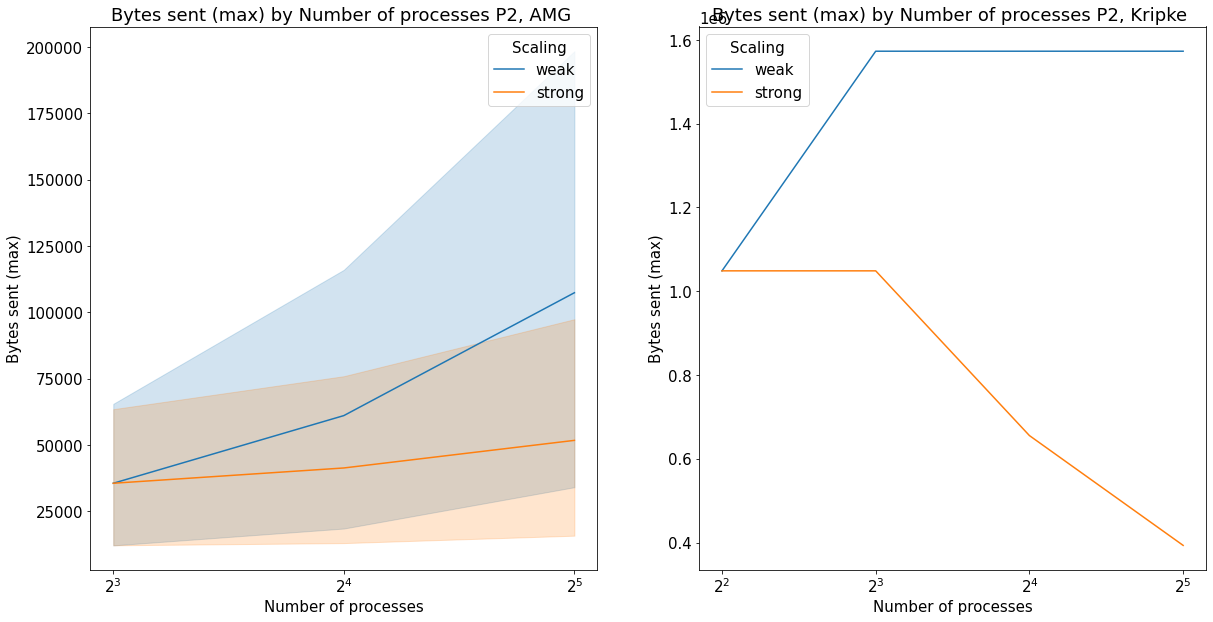

<Figure size 432x288 with 0 Axes>

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

amg_node_weak = filtered_tk_amg_halo_weak.dataframe.loc[filtered_tk_amg_halo_weak.get_node("halo_exchange")]
kripke_node_weak = filtered_tk_kripke_weak.dataframe.loc[filtered_tk_kripke_weak.get_node("halo_exchange")]

amg_node_strong = filtered_tk_amg_halo.dataframe.loc[filtered_tk_amg_halo.get_node("halo_exchange")]
kripke_node_strong = filtered_tk_kripke.dataframe.loc[filtered_tk_kripke.get_node("halo_exchange")]
fig, ax = plt.subplots(1,2, figsize=(20, 10), sharey=False)

df_amg = amg_node_weak.append(amg_node_strong, ignore_index=True)
df_kripke = kripke_node_weak.append(kripke_node_strong, ignore_index=True)

sns.lineplot(data=df_amg, x='mpi.world.size', ax=ax[0], y='Bytes sent (max)', hue="Scaling")
sns.lineplot(data=df_kripke, x='mpi.world.size', ax=ax[1], y='Bytes sent (max)', hue="Scaling")


ax[0].set_title('Bytes sent (max) by Number of processes P2, AMG ')
ax[1].set_title('Bytes sent (max) by Number of processes P2, Kripke ')
ax[0].set_xlabel('Number of processes')
ax[1].set_xlabel('Number of processes')
plt.ylabel('Bytes sent (max)')
ax[0].set_xscale("log", base=2)
ax[1].set_xscale("log", base=2)

# Display the plot
plt.show()
plt.savefig("Bytes sent (max) AMG_KripkeP2.svg")

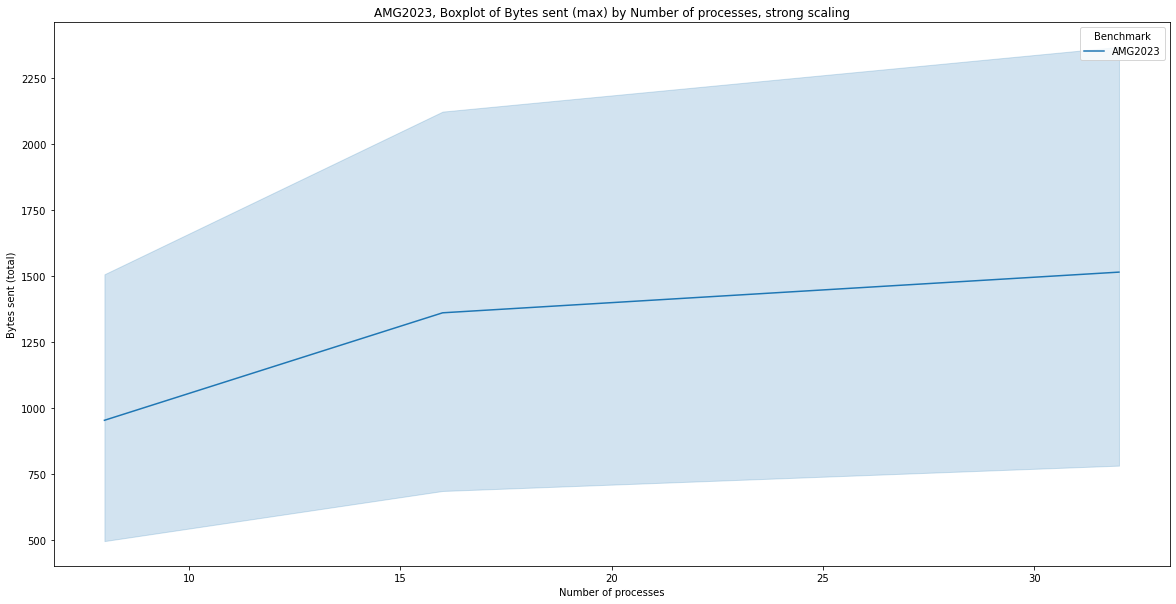

<Figure size 432x288 with 0 Axes>

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 10))

#df = filtered_tk_amg_halo.dataframe.append(filtered_tk_kripke.dataframe, ignore_index=True)

sns.lineplot(data=filtered_tk_amg_halo.dataframe, x='mpi.world.size', y='Bytes sent (max)', hue="Benchmark")

plt.title('AMG2023, Boxplot of Bytes sent (max) by Number of processes, strong scaling')
plt.xlabel('Number of processes')
plt.ylabel('Bytes sent (total)')

# Display the plot
plt.show()
plt.savefig("Bytes sent (total)_strong.svg")

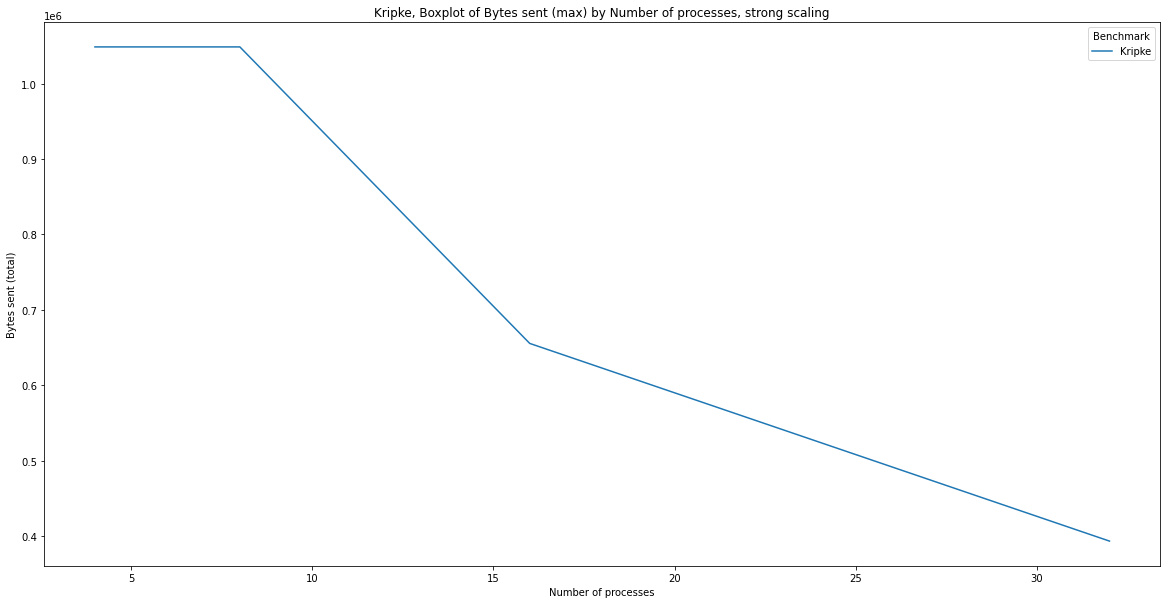

<Figure size 432x288 with 0 Axes>

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 10))

#df = filtered_tk_amg_halo.dataframe.append(filtered_tk_kripke.dataframe, ignore_index=True)

sns.lineplot(data=filtered_tk_kripke.dataframe, x='mpi.world.size', y='Bytes sent (max)', hue="Benchmark")

plt.title('Kripke, Boxplot of Bytes sent (max) by Number of processes, strong scaling')
plt.xlabel('Number of processes')
plt.ylabel('Bytes sent (total)')

# Display the plot
plt.show()
plt.savefig("Bytes sent (total)_strong_kripke.svg")

# plot graphs for strong scaling 

/tmp/ipykernel_164869/2403794037.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = filtered_tk_amg_halo.dataframe.append(filtered_tk_kripke.dataframe, ignore_index=True)


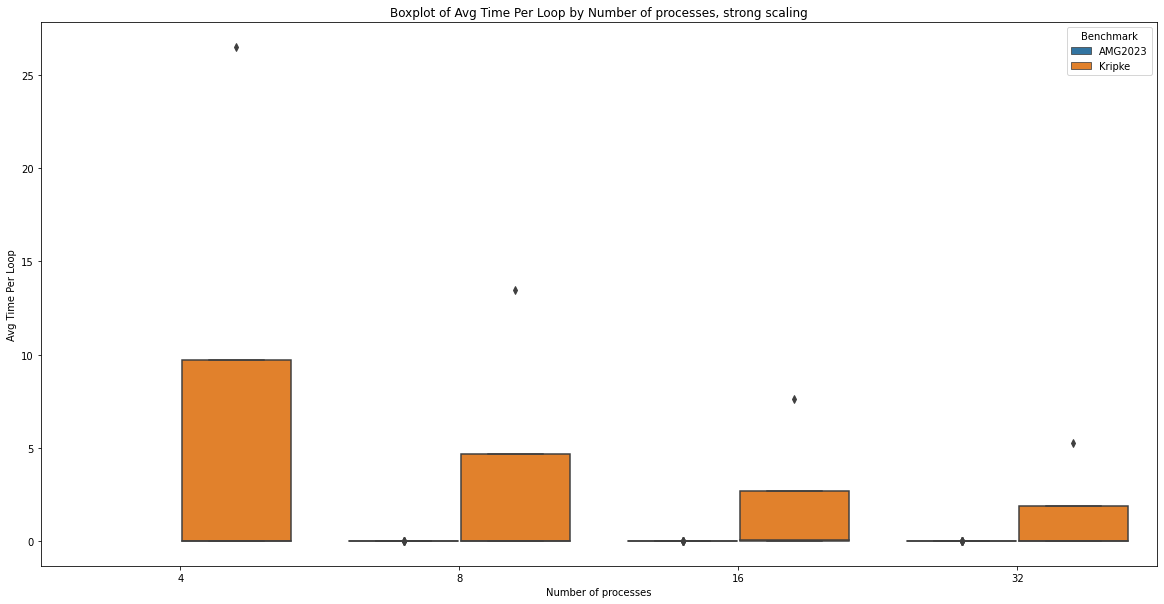

<Figure size 432x288 with 0 Axes>

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
df = filtered_tk_amg_halo.dataframe.append(filtered_tk_kripke.dataframe, ignore_index=True)
#print(df)
plt.figure(figsize=(20, 10))
sns.boxplot(data=df, x='mpi.world.size', y='Avg Time Per Loop', hue="Benchmark")

plt.title('Boxplot of Avg Time Per Loop by Number of processes, strong scaling')
plt.xlabel('Number of processes')
plt.ylabel('Avg Time Per Loop')

# Display the plot
plt.show()
plt.savefig("Avg Time Per Loop_strong.svg")

/tmp/ipykernel_164869/1726889839.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = filtered_tk_amg_halo.dataframe.append(filtered_tk_kripke.dataframe, ignore_index=True)


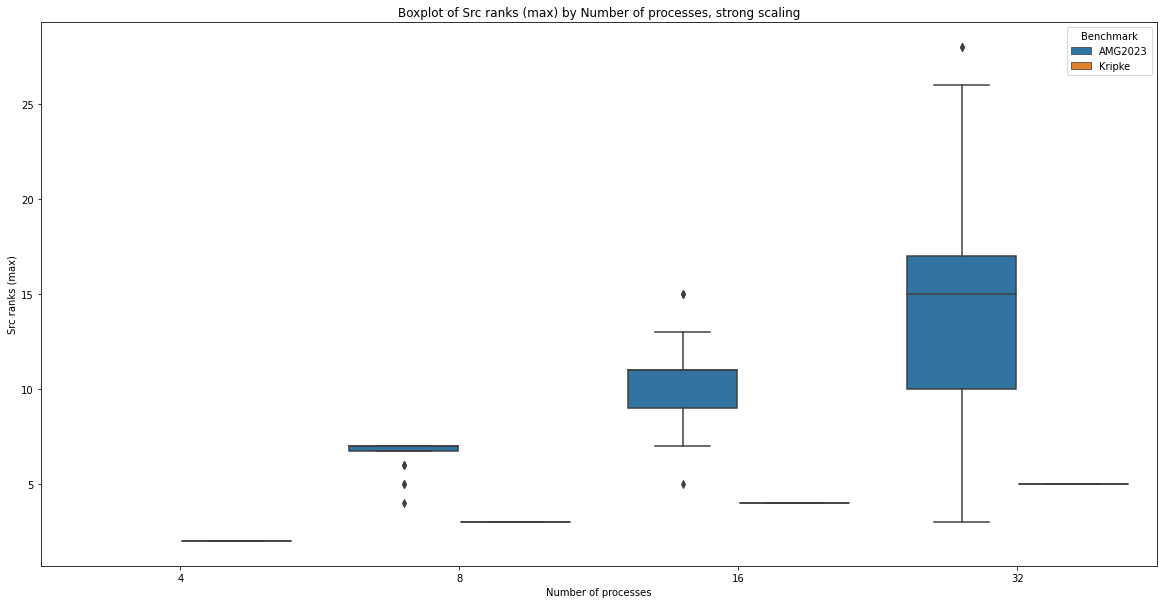

<Figure size 432x288 with 0 Axes>

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 10))

df = filtered_tk_amg_halo.dataframe.append(filtered_tk_kripke.dataframe, ignore_index=True)
sns.boxplot(data=df, x='mpi.world.size', y='Src ranks (max)', hue="Benchmark")

plt.title('Boxplot of Src ranks (max) by Number of processes, strong scaling')
plt.xlabel('Number of processes')
plt.ylabel('Src ranks (max)')

# Display the plot
plt.show()
plt.savefig("Src ranks_strong.svg")

/tmp/ipykernel_164869/3525096349.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = filtered_tk_amg_halo.dataframe.append(filtered_tk_kripke.dataframe, ignore_index=True)


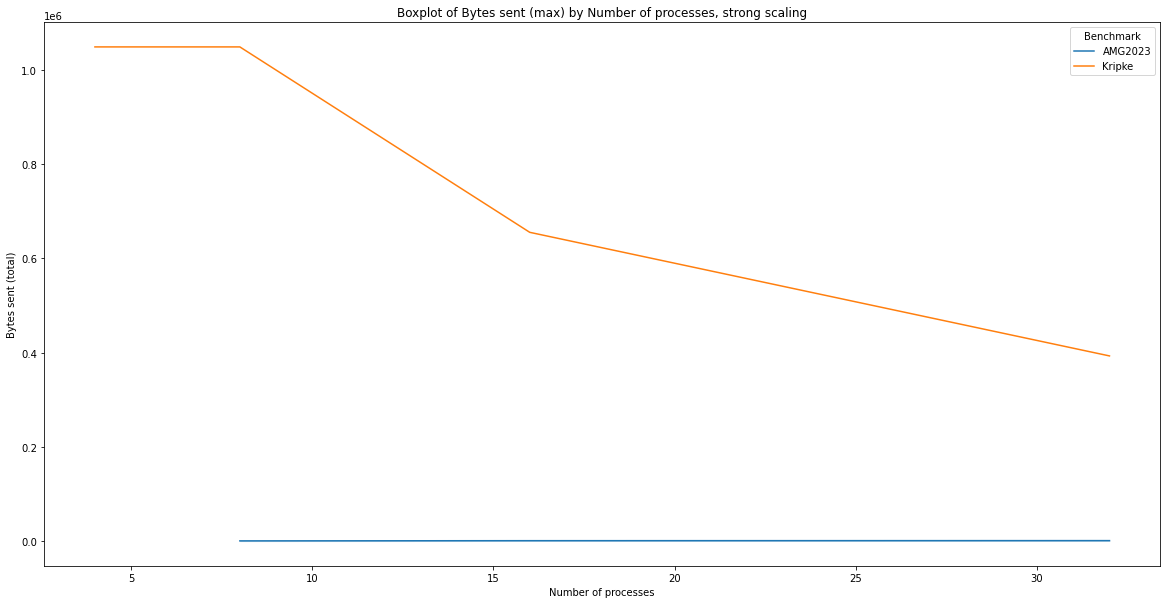

<Figure size 432x288 with 0 Axes>

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 10))

df = filtered_tk_amg_halo.dataframe.append(filtered_tk_kripke.dataframe, ignore_index=True)
sns.lineplot(data=df, x='mpi.world.size', y='Bytes sent (max)', hue="Benchmark")

plt.title('Boxplot of Bytes sent (max) by Number of processes, strong scaling')
plt.xlabel('Number of processes')
plt.ylabel('Bytes sent (total)')

# Display the plot
plt.show()
plt.savefig("Bytes sent (total)_strong.svg")